#*Section 2 Project : 공공도서관 상호대차 서비스 재이용자 예측 프로젝트*

##**1. EDA & Data Wrangling**

###1-0. 공공도서관 대출정보
- 공공도서관 누적 회원 수 : 100986

In [ ]:
!pip install pdpbox==0.2

In [ ]:
import pandas as pd
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 공공도서관 대출정보 데이터 불러오기
pub_loan = pd.read_csv('/content/drive/MyDrive/00_AIB/02_Section2/Section 2 PJT/02_공공도서관 대출정보/01_pub_lib_loan_data.csv')

In [ ]:
# 공공도서관 대출정보 칼럼정의서 불러오기
pub_loan_col_def = pd.read_excel('/content/drive/MyDrive/00_AIB/02_Section2/Section 2 PJT/02_공공도서관 대출정보/02_pub_lib_loan_data_column_def.xls')
pub_loan_col_def.drop('순서', axis=1, inplace=True)
pub_loan_col_def

,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,SEQ_NO,일련번호,varchar,100.0,Y,Y
1,BOOK_KEY_NO,책제어번호번호,varchar,20.0,N,N
2,MBER_SEQ_NO_VALUE,회원일련번호값,varchar,100.0,N,N
3,LON_DE,대출일자,datetime,NaN,N,N
4,RTURN_DE,반납일자,datetime,NaN,N,N
5,LBRRY_CD,도서관코드,int,1.0,Y,Y
6,LON_STLE_NM,대출형태명,varchar,10.0,N,N
7,RTURN_STLE_NM,반납형태명,varchar,10.0,N,N
8,RTURN_PREARNGE_DE,반납예정일자,datetime,NaN,N,N
9,RESVE_DE,예약일자,datetime,NaN,N,N


In [ ]:
pub_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751392 entries, 0 to 751391
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   SEQ_NO             751392 non-null  int64 
 1   BOOK_KEY_NO        751392 non-null  int64 
 2   MBER_SEQ_NO_VALUE  751392 non-null  object
 3   LON_DE             751392 non-null  object
 4   RTURN_DE           623923 non-null  object
 5   LBRRY_CD           751392 non-null  int64 
 6   LON_STLE_NM        751386 non-null  object
 7   RTURN_STLE_NM      634157 non-null  object
 8   RTURN_PREARNGE_DE  751392 non-null  object
 9   RESVE_DE           21308 non-null   object
 10  RESVE_END_DE       21272 non-null   object
 11  LON_STATE_NM       751392 non-null  object
 12  LON_PLACE_NM       745427 non-null  object
 13  RTURN_PLACE_NM     619440 non-null  object
 14  MANAGE_LBRRY_CD    751392 non-null  object
 15  LON_LBRRY_CD       564316 non-null  object
 16  RTURN_LBRRY_CD     1

In [ ]:
pub_loan.sample(10)

,SEQ_NO,BOOK_KEY_NO,MBER_SEQ_NO_VALUE,LON_DE,RTURN_DE,LBRRY_CD,LON_STLE_NM,RTURN_STLE_NM,RTURN_PREARNGE_DE,RESVE_DE,RESVE_END_DE,LON_STATE_NM,LON_PLACE_NM,RTURN_PLACE_NM,MANAGE_LBRRY_CD,LON_LBRRY_CD,RTURN_LBRRY_CD,MASTR_LBRRY_CD
466278,162770249,99429782,a2b6995fab23e3f672957d3bd5570610bed1273727b75f...,2023-01-07 12:00:00.0,2023-02-05 12:00:00.0,32400,3,3.0,2023-02-01 12:00:00.0,NaN,NaN,1,KOLASIII,KOLASIII,MS,NaN,NaN,32400
395086,60000179470752,60000071511594,2cdba7e88f5fdd225f53cc0a49d1fb00ae12cc99fa1e75...,2023-02-26 12:00:00.0,NaN,31702,3,NaN,2023-03-12 12:00:00.0,NaN,NaN,0,UJBSELF01,NaN,MK,MK,NaN,31700
556612,164178856,81763860,b112299327c349070d4374fa7cd0f00d8999196a0b9597...,2023-01-29 12:00:00.0,2023-02-07 12:00:00.0,32403,3,3.0,2023-02-19 12:00:00.0,NaN,NaN,1,KOLASIII,KOLASIII,MB,NaN,NaN,32400
603294,165050578,119670884,158512bbdb7ee3bb5eec38a8b3a7b2733560e0b9ba76a6...,2023-02-10 12:00:00.0,2023-02-21 12:00:00.0,32404,0,3.0,2023-02-24 12:00:00.0,NaN,NaN,1,KOLASIII,SMARTID,MF,NaN,MF,32400
635559,403563104,403553221,4b3bde1d01180a34cd8bddc2b5d485bf6484bf3e3801a7...,2023-02-08 12:00:00.0,2023-02-23 12:00:00.0,32500,3,0.0,2023-02-22 12:00:00.0,NaN,NaN,1,SMARTID,KOLASIII,MF,MF,MF,32500
654539,73342385,70844143,094a9b397318786e546e8bed1442339f87d8c2a1d892e4...,2023-01-26 12:00:00.0,2023-02-06 12:00:00.0,32700,3,3.0,2023-02-16 12:00:00.0,NaN,NaN,5,SMARTID,SMARTID,MA,MA,MA,32700
34559,48023071,7664030,F7A55DE0A546DC67E555A8798CC4DC4B722E51A8,2023-02-22 12:00:00.0,2023-02-25 12:00:00.0,31119,일반대출,정상반납,2023-03-08 12:00:00.0,NaN,NaN,정상반납,NICOM,NICOM,GJ000000,GJ000000,GJ000000,31100
211164,362451820,117126281,717A67B0550F7D17105D4F7AC35868BFF7536749,2023-02-07 12:00:00.0,2023-02-10 12:00:00.0,31505,3,3.0,2023-02-21 12:00:00.0,NaN,NaN,1,EZ-210RS,EZ-210RS,MJ,MJ,NaN,31500
439057,60000172769292,60000071898653,ec76333ef288b01c8f94d8b51ff98e488b975f4578c31c...,2023-02-02 12:00:00.0,2023-02-24 12:00:00.0,31710,3,3.0,2023-02-23 12:00:00.0,NaN,NaN,5,GCSELF01,GCRETURN01,MG,MG,NaN,31700
597731,164637649,119347157,fc516c27d2f6707b8bd0990bb558f95e239b52e6427dda...,2023-02-04 12:00:00.0,2023-02-25 12:00:00.0,32404,3,3.0,2023-02-25 12:00:00.0,NaN,NaN,1,SMARTID,SMARTID,MF,MF,MF,32400


In [ ]:
# 누적 회원 수
pub_loan['MBER_SEQ_NO_VALUE'].nunique()

100986

In [ ]:
# 대출형태
pub_loan['LON_STLE_NM'].unique() # 각 대출 형태가 뭘 뜻하는 건지 확인 필요

array(['특별대출', '일반대출', 'DVD 대출', '타도서관대출', '사물함키대출', '연간물대출', nan, '0',
       '3', 3, 0, 1, 2, 5], dtype=object)

In [ ]:
# 대출형태 비율
pub_loan['LON_STLE_NM'].value_counts(normalize=True).sort_values(ascending=False)

3         0.608658
0         0.282722
일반대출      0.082739
1         0.021160
특별대출      0.002160
타도서관대출    0.000803
0         0.000737
DVD 대출    0.000391
5         0.000242
3         0.000241
사물함키대출    0.000106
연간물대출     0.000035
2         0.000007
Name: LON_STLE_NM, dtype: float64

In [ ]:
pub_loan['RTURN_STLE_NM'].unique()

array(['정상반납', '연체반납', '대출중', '0', '3', nan, 3.0, 0.0, 1.0, 2.0, '1', 'L',
       '2'], dtype=object)

### 1-1. 상호대차 데이터
- pub_co_loan


In [ ]:
# 공공도서관 상호대차 분석정보 데이터 불러오기
pub_co_loan = pd.read_csv('/content/drive/MyDrive/00_AIB/02_Section2/Section 2 PJT/03_공공도서관_상호대차_분석정보/01_pub_lib_co-loan_data.csv')

In [ ]:
# 공공도서관 상호대차 분석정도 컬럼정의서 불러오기
pub_co_loan_col_def = pd.read_excel('/content/drive/MyDrive/00_AIB/02_Section2/Section 2 PJT/03_공공도서관_상호대차_분석정보/02_pub_lib_co-loan_data_column_def.xls')
pub_co_loan_col_def

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,MASTR_LBRRY_CD,마스터도서관코드,int,5,Y,N
1,2,MTLTY_LON_NO,상호_대출_번호,varchar,14,Y,N
2,3,LON_REC_KEY_NO,대출_레코드키,varchar,100,N,Y
3,4,BOOK_KEY_NO,책제어번호,varchar,20,N,Y
4,5,USER_KEY_NM,회원아이디_명,varchar,100,N,Y
5,6,PROVD_LBRRY_CD,제공_도서관_코드,int,5,N,Y
6,7,REQUST_LBRRY_CD,요청_도서관_코드,int,5,N,Y
7,8,RTURN_LBRRY_CD,반납_도서관_코드,int,5,N,Y
8,9,REQUST_DE,요청_일자,varchar,10,N,Y
9,10,SNDNG_DE,발송_일자,varchar,10,N,Y


In [ ]:
pub_co_loan.head()

,MASTR_LBRRY_CD,MTLTY_LON_NO,LON_REC_KEY_NO,BOOK_KEY_NO,USER_KEY_NM,PROVD_LBRRY_CD,REQUST_LBRRY_CD,RTURN_LBRRY_CD,REQUST_DE,SNDNG_DE,RTRN_DE,COMPT_DE
0,26200,2330428,1837684259,1156867021,15C3652E256CB8C1A74208A3643E61768B7C2717,26204,26207,26207,20211119,20211122,20211129,20211201
1,4300,4883783,673962925,556696989,87F7635ADC4CCDAA70329221B032567F0FE2CFD7,4339,4321,4326,20211117,20211118,20211129,20211130
2,26200,2330408,1837686762,1113995618,B0807F0C04EF7C39A64C3AB365A037973621C905,26210,26246,26246,20211119,20211122,20211130,20211201
3,26200,2329671,1837666315,1812456023,7FFA5F4D1A4D3050B0FEABB010EB2897E6DEB1C9,26204,26203,26203,20211119,20211119,20211130,20211201
4,26200,2329675,1837666317,1153801365,7FFA5F4D1A4D3050B0FEABB010EB2897E6DEB1C9,26211,26203,26203,20211119,20211119,20211130,20211201


In [ ]:
pub_co_loan.tail()

,MASTR_LBRRY_CD,MTLTY_LON_NO,LON_REC_KEY_NO,BOOK_KEY_NO,USER_KEY_NM,PROVD_LBRRY_CD,REQUST_LBRRY_CD,RTURN_LBRRY_CD,REQUST_DE,SNDNG_DE,RTRN_DE,COMPT_DE
191217,9000,553432,368033433,321709777,2ac3644ea6ee330f81fb2bbd050df90ad263a2b8f95af8...,9001,9009,9009,20211031,20211102,20211130,20211202
191218,9000,552349,367916791,365196017,381d0a23aba9d9d1479e47f58eb0aced5ffa75991ccbdf...,9015,9000,9000,20211028,20211029,20211202,20211202
191219,1200,31128433,287385516,277129177,EB3122B4DF2FBC469C20F6F62B3FE8127D9FD99D,1205,1202,1202,20211014,20211019,20211130,20211130
191220,4300,4883793,673962930,556696997,0755D385C705DD7A452D94D679D33905C37C29B7,4339,4321,4326,20211117,20211118,20211129,20211130
191221,4300,4883791,673962929,556696993,0755D385C705DD7A452D94D679D33905C37C29B7,4339,4321,4326,20211117,20211118,20211129,20211130


In [ ]:
pub_co_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191222 entries, 0 to 191221
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   MASTR_LBRRY_CD   191222 non-null  int64 
 1   MTLTY_LON_NO     191222 non-null  int64 
 2   LON_REC_KEY_NO   191222 non-null  int64 
 3   BOOK_KEY_NO      191222 non-null  int64 
 4   USER_KEY_NM      191222 non-null  object
 5   PROVD_LBRRY_CD   191222 non-null  int64 
 6   REQUST_LBRRY_CD  191222 non-null  int64 
 7   RTURN_LBRRY_CD   191222 non-null  int64 
 8   REQUST_DE        191222 non-null  int64 
 9   SNDNG_DE         191222 non-null  int64 
 10  RTRN_DE          191222 non-null  int64 
 11  COMPT_DE         191222 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 17.5+ MB


In [ ]:
# 상호대출 데이터프레임 날짜 형식 칼럼 datetime으로 바꿔주기
for col in pub_co_loan.columns :
  if 'DE' in col :
    pub_co_loan[col] = pd.to_datetime(pub_co_loan[col], format='%Y%m%d')
pub_co_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191222 entries, 0 to 191221
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   MASTR_LBRRY_CD   191222 non-null  int64         
 1   MTLTY_LON_NO     191222 non-null  int64         
 2   LON_REC_KEY_NO   191222 non-null  int64         
 3   BOOK_KEY_NO      191222 non-null  int64         
 4   USER_KEY_NM      191222 non-null  object        
 5   PROVD_LBRRY_CD   191222 non-null  int64         
 6   REQUST_LBRRY_CD  191222 non-null  int64         
 7   RTURN_LBRRY_CD   191222 non-null  int64         
 8   REQUST_DE        191222 non-null  datetime64[ns]
 9   SNDNG_DE         191222 non-null  datetime64[ns]
 10  RTRN_DE          191222 non-null  datetime64[ns]
 11  COMPT_DE         191222 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(7), object(1)
memory usage: 17.5+ MB


In [ ]:
# 안 쓸 칼럼 드랍
drops = ['LON_REC_KEY_NO', 'BOOK_KEY_NO']
pub_co_loan.drop(drops, axis=1, inplace=True)

In [ ]:
pub_co_loan.head(2)

,MASTR_LBRRY_CD,MTLTY_LON_NO,USER_KEY_NM,PROVD_LBRRY_CD,REQUST_LBRRY_CD,RTURN_LBRRY_CD,REQUST_DE,SNDNG_DE,RTRN_DE,COMPT_DE
0,26200,2330428,15C3652E256CB8C1A74208A3643E61768B7C2717,26204,26207,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01
1,4300,4883783,87F7635ADC4CCDAA70329221B032567F0FE2CFD7,4339,4321,4326,2021-11-17,2021-11-18,2021-11-29,2021-11-30


In [ ]:
# 상호대차 데이터 칼럼 이름 소문자로 변경
pub_co_loan.columns = [col.lower() for col in pub_co_loan.columns]
pub_co_loan.head(2)

,mastr_lbrry_cd,mtlty_lon_no,user_key_nm,provd_lbrry_cd,requst_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de
0,26200,2330428,15C3652E256CB8C1A74208A3643E61768B7C2717,26204,26207,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01
1,4300,4883783,87F7635ADC4CCDAA70329221B032567F0FE2CFD7,4339,4321,4326,2021-11-17,2021-11-18,2021-11-29,2021-11-30


###1-2. 도서관 정보 데이터
- lib_data

In [ ]:
# 도서관코드 매핑 위해 데이터 불러오기
lib = pd.read_csv('/content/drive/MyDrive/00_AIB/02_Section2/Section 2 PJT/04_기타 데이터/도서관코드_도서관이름.csv')

In [ ]:
# 안 쓸 칼럼 드랍
drops = ['LBRRY_ADDR', 
         'TEL_NO', 
         'FAX_NO', 
         'HMPG_VALUE', 
         'OPNNG_TIME', 
         'CLOSEDON_DC', 
         'OPNNG_YEAR', 
         'ZIP_NO',
         'X_CRDNT_VALUE',
         'Y_CRDNT_VALUE',
         'MUMM_LON_YEAR',
         'BSNS_PARTCPTN_YEAR',
         'LBRRY_NCM_NM',
         'ETC_LBRRY_CD',
         'ETC_LBRRY_ADDR',
         'ETC_LBRRY_NM',
         'TWO_ETC_LBRRY_NM',
         'REPRSNT_AT',
         'WETHR_AREA_CD',
         'ONE_AREA_CD',	
         'TWO_AREA_CD',
         'FOND_MBY_VALUE',
         'AREA_CD',
         'LBRRY_TY_CD',
         'API_LBRRY_NO'
         ]
lib_data = lib.copy().drop(drops, axis=1)
lib_data.columns = [col.lower() for col in lib_data.columns]
lib_data

,lbrry_cd,lbrry_nm,lbrry_la,lbrry_lo,one_area_nm,two_area_nm,lbrry_no,lbrry_ty_nm,mastr_lbrry_cd
0,1500,포천시립중앙도서관,37.905303,127.206376,경기도,포천시,141333.0,공공,1500
1,1501,포천시립소흘도서관,37.829605,127.137534,경기도,포천시,141172.0,공공,1500
2,1502,포천시립일동도서관,37.954936,127.315456,경기도,포천시,141094.0,공공,1500
3,1503,포천시립영중꿈나무도서관,38.005629,127.245302,경기도,포천시,141102.0,공공,1500
4,1504,포천시립영북도서관,38.087682,127.274170,경기도,포천시,141520.0,공공,1500
...,...,...,...,...,...,...,...,...,...
1492,2657,원동작은도서관,35.370255,128.920549,경상남도,양산시,748149.0,작은,2600
1493,2624,물구나무작은도서관,35.416340,129.173441,경상남도,양산시,148179.0,작은,2600
1494,6704,제천기적의도서관,37.155205,128.220023,충청북도,제천시,143025.0,공공,6700
1495,33600,남원시립도서관,35.407697,127.380214,전라북도,남원시,145050.0,공공,33600


###1-3. EDA & 전처리


In [ ]:
pub_co_loan.head()

,mastr_lbrry_cd,mtlty_lon_no,user_key_nm,provd_lbrry_cd,requst_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de
0,26200,2330428,15C3652E256CB8C1A74208A3643E61768B7C2717,26204,26207,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01
1,4300,4883783,87F7635ADC4CCDAA70329221B032567F0FE2CFD7,4339,4321,4326,2021-11-17,2021-11-18,2021-11-29,2021-11-30
2,26200,2330408,B0807F0C04EF7C39A64C3AB365A037973621C905,26210,26246,26246,2021-11-19,2021-11-22,2021-11-30,2021-12-01
3,26200,2329671,7FFA5F4D1A4D3050B0FEABB010EB2897E6DEB1C9,26204,26203,26203,2021-11-19,2021-11-19,2021-11-30,2021-12-01
4,26200,2329675,7FFA5F4D1A4D3050B0FEABB010EB2897E6DEB1C9,26211,26203,26203,2021-11-19,2021-11-19,2021-11-30,2021-12-01


In [ ]:
lib_data.head()

,lbrry_cd,lbrry_nm,lbrry_la,lbrry_lo,one_area_nm,two_area_nm,lbrry_no,lbrry_ty_nm,mastr_lbrry_cd
0,1500,포천시립중앙도서관,37.905303,127.206376,경기도,포천시,141333.0,공공,1500
1,1501,포천시립소흘도서관,37.829605,127.137534,경기도,포천시,141172.0,공공,1500
2,1502,포천시립일동도서관,37.954936,127.315456,경기도,포천시,141094.0,공공,1500
3,1503,포천시립영중꿈나무도서관,38.005629,127.245302,경기도,포천시,141102.0,공공,1500
4,1504,포천시립영북도서관,38.087682,127.274170,경기도,포천시,141520.0,공공,1500


#### 한 사람당 상호대차 서비스 이용 건수 시각화

In [ ]:
# 상호대차 서비스를 이용한 사람의 수
pub_co_loan['user_key_nm'].nunique()

55996

In [ ]:
# 상호대차 이용 건수
pub_co_loan['mtlty_lon_no'].nunique()

188594

In [ ]:
# 한 사람당 상호대차 서비스 이용 건수
serviced_per_user = pub_co_loan.groupby('user_key_nm')['mtlty_lon_no'].nunique()
serviced_per_user = pd.DataFrame(serviced_per_user).reset_index(drop=True)
serviced_per_user

,mtlty_lon_no
0,10
1,14
2,2
3,2
4,1
...,...
55991,17
55992,4
55993,4
55994,3


In [ ]:
serviced_per_user.describe()

,mtlty_lon_no
count,55996.000000
mean,3.414922
std,3.558624
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,52.000000


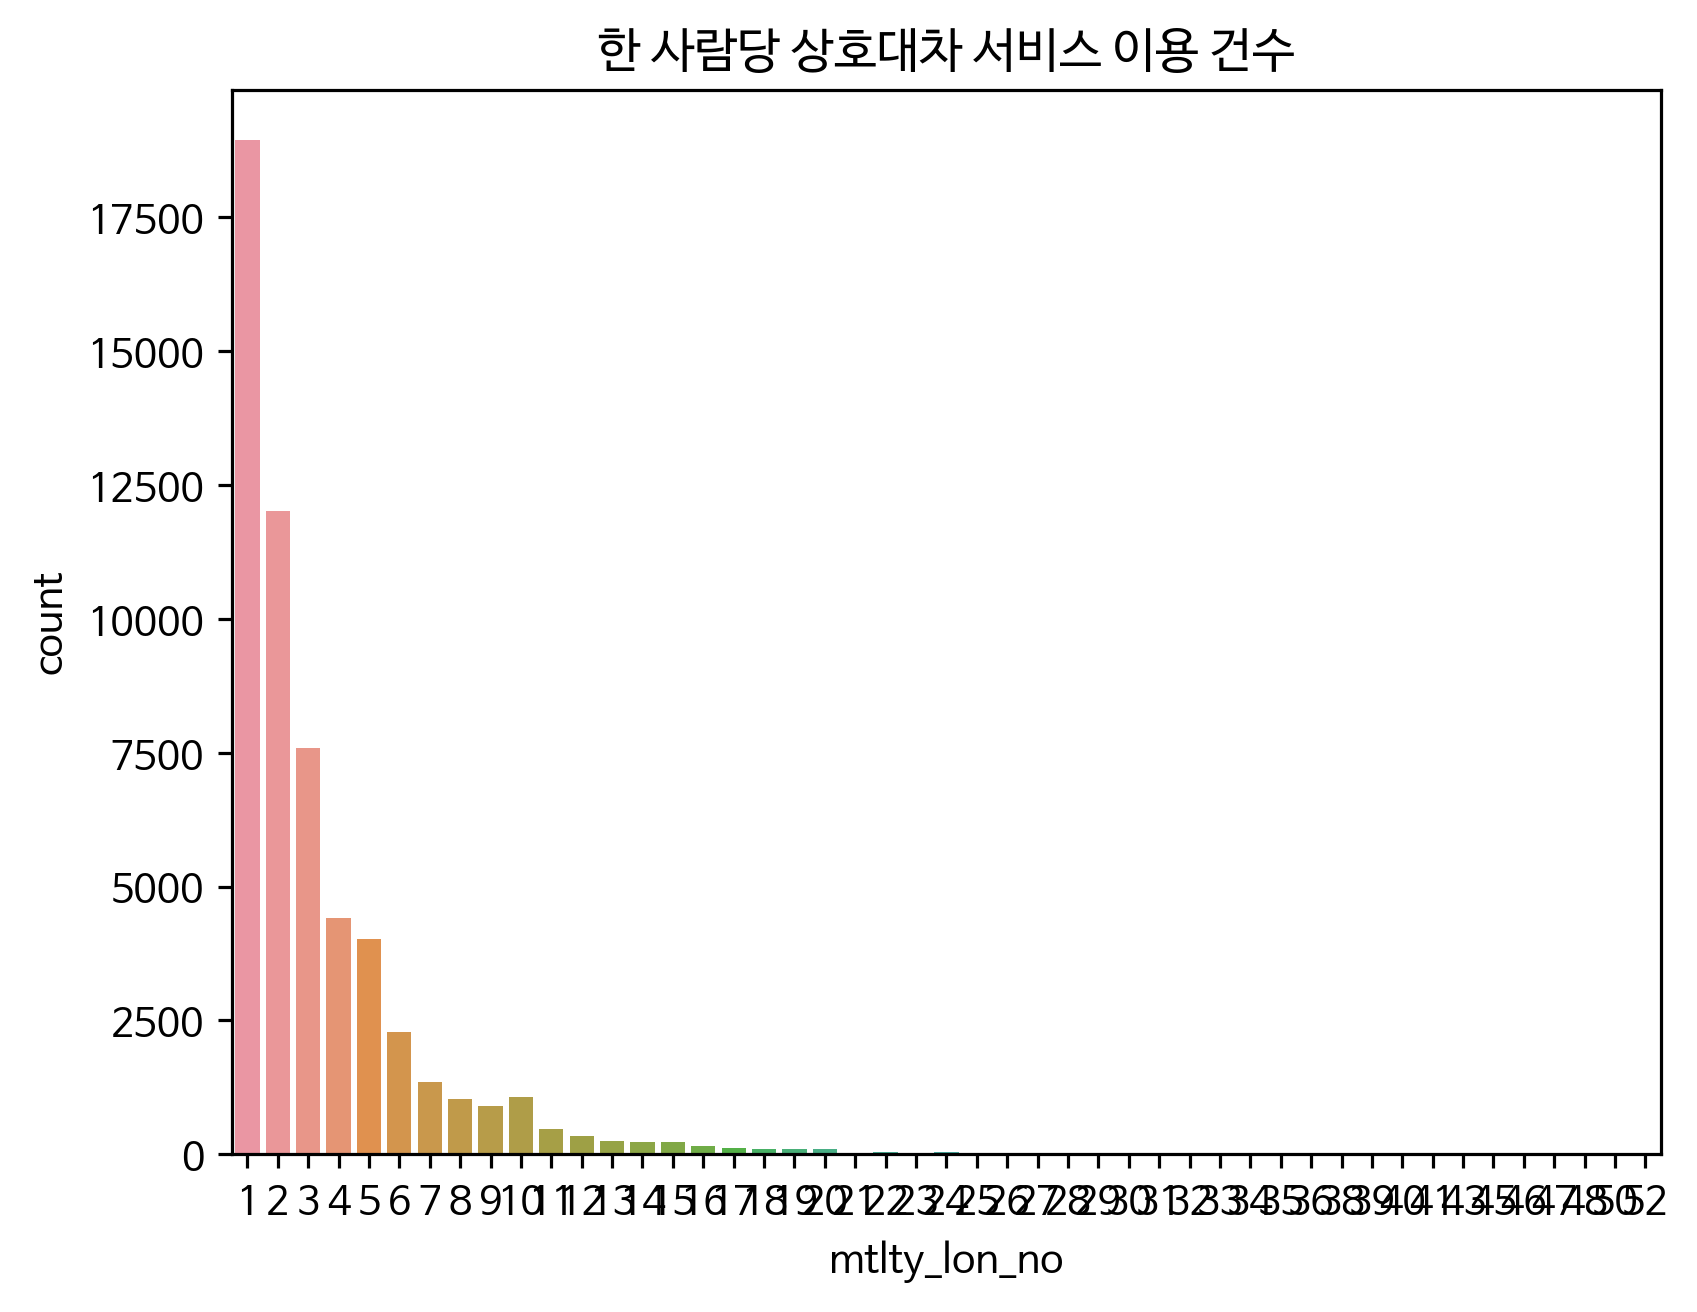

In [ ]:
#plt.figure(figsize=(10, 2))
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
sns.countplot(x='mtlty_lon_no', data=serviced_per_user)
plt.title('한 사람당 상호대차 서비스 이용 건수')
plt.show()

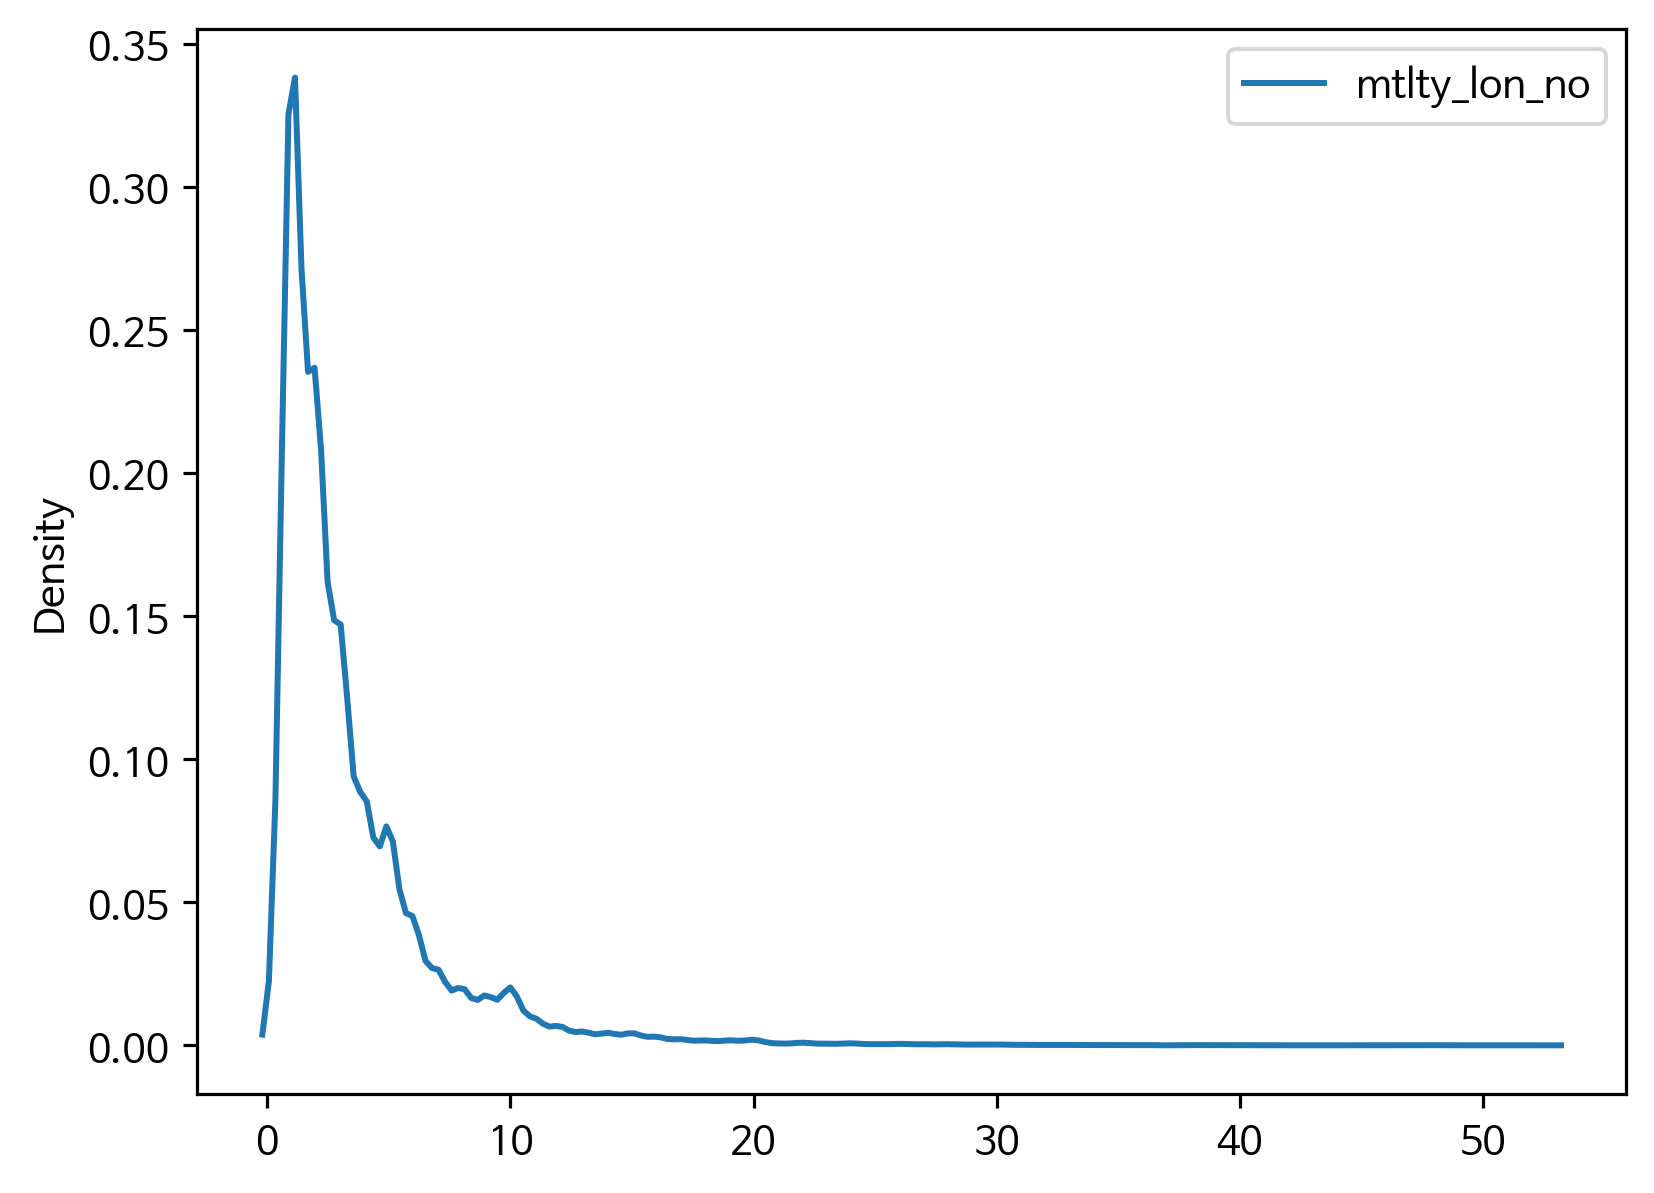

In [ ]:
# 이용자들의 상호대차 서비스 이용 분포
# 자주 사용하는 사람들보다는 몇 번 이용하고 마는 사람들이 많은 것
import seaborn as sns
import matplotlib.pyplot as plt

data =  serviced_per_user
sns.kdeplot(data)

In [ ]:
# # 박스 플롯
# fig, ax = plt.subplots()
# fig.set_size_inches(3, 6)
# ax.boxplot(data)

# ax.set_xticklabels(['한 사람당 상호대차 서비스 이용 건수'])

# # 그래프 제목 설정
# plt.title('한 사람당 상호대차 서비스 이용 건수')

# # 그래프 보여주기
# plt.show()

#### 도서관 위치 merge

In [ ]:
# 도서관 데이터 칼럼 순서 조정
lib_data = lib_data[['mastr_lbrry_cd', 'one_area_nm', 'two_area_nm', 
                     'lbrry_ty_nm', 'lbrry_nm', 'lbrry_cd', 'lbrry_no', 'lbrry_la', 'lbrry_lo']]

In [ ]:
# 확인
lib_data.sample(5)

,mastr_lbrry_cd,one_area_nm,two_area_nm,lbrry_ty_nm,lbrry_nm,lbrry_cd,lbrry_no,lbrry_la,lbrry_lo
1382,32200,울산광역시,동구,공공,남목도서관,32200,131082.0,35.545572,129.427755
1078,28200,서울특별시,서대문구,작은,꿈이있는작은도서관,28216,111280.0,37.586067,126.949351
264,1900,경상남도,창원시 성산구,공공,성산도서관,1909,148120.0,35.202014,128.707115
166,4700,서울특별시,용산구,공공,서울특별시교육청용산도서관,4716,111019.0,37.551988,126.980123
895,1200,서울특별시,동대문구,작은,장안2동 작은도서관,1215,711408.0,37.578432,127.070577


In [ ]:
# 도서관 데이터 기술통계
lib_data.describe(include='all')

,mastr_lbrry_cd,one_area_nm,two_area_nm,lbrry_ty_nm,lbrry_nm,lbrry_cd,lbrry_no,lbrry_la,lbrry_lo
count,1497.000000,1497,1497,1497,1497,1497.000000,1480.000000,1496.000000,1496.000000
unique,NaN,17,237,2,1492,NaN,NaN,NaN,NaN
top,NaN,경기도,김해시,공공,아름드리작은도서관,NaN,NaN,NaN,NaN
freq,NaN,381,48,1061,3,NaN,NaN,NaN,NaN
mean,15648.296593,NaN,NaN,NaN,NaN,15661.670007,203984.316216,36.686959,127.547225
std,11117.988332,NaN,NaN,NaN,NaN,11118.706464,189497.051475,1.010364,0.872858
min,100.000000,NaN,NaN,NaN,NaN,100.000000,50001.000000,33.244260,126.184563
25%,5300.000000,NaN,NaN,NaN,NaN,5308.000000,127083.250000,35.859754,126.928413
50%,11300.000000,NaN,NaN,NaN,NaN,11306.000000,141573.500000,37.161221,127.102921
75%,27800.000000,NaN,NaN,NaN,NaN,27810.000000,147063.750000,37.527086,128.419169


In [ ]:
# 상호대차 데이터 칼럼 순서 조정
c = pub_co_loan[
    ['mtlty_lon_no', 
    'mastr_lbrry_cd', 
     'provd_lbrry_cd',
     'requst_lbrry_cd', 
     'rturn_lbrry_cd',
     'requst_de',
     'sndng_de',
     'rtrn_de',
     'compt_de',
     'user_key_nm']
       ]

In [ ]:
pub_co_loan.sample(5)

,mastr_lbrry_cd,mtlty_lon_no,user_key_nm,provd_lbrry_cd,requst_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de
157389,25900,30000001362199,300520,25904,25901,25901,2021-11-24,2021-11-26,2021-12-15,2021-12-15
16327,25400,1326313,9fb3d2af-b24d-4327-bbb5-af5e4a7df773,25407,25432,25432,2021-12-15,2021-12-16,2021-12-28,2021-12-29
127908,31400,58040,bbfa3ec87b4645fcc16de76822ca3009c26959bb616dda...,31401,31400,31400,2021-11-03,2021-11-03,2021-12-03,2021-12-07
101715,4500,3382355,98B83CB46A3DD5D8CC055412E0627A3B6E54A305,4502,4514,4514,2021-11-15,2021-11-17,2021-11-29,2021-12-01
83085,4300,4868583,0A11C0C6C045CFC51E0EF2636C6B4DFF74B422B8,4305,4322,4322,2021-11-09,2021-11-10,2021-11-29,2021-11-30


In [ ]:
# 마스터 도서관별로 데이터 정렬
lib_data.sort_values('mastr_lbrry_cd').reset_index(drop=True)

,mastr_lbrry_cd,one_area_nm,two_area_nm,lbrry_ty_nm,lbrry_nm,lbrry_cd,lbrry_no,lbrry_la,lbrry_lo
0,100,서울특별시,성북구,공공,종암동새날도서관,108,111188.0,37.599030,127.035098
1,100,서울특별시,성북구,공공,아리랑어린이도서관,110,111468.0,37.599107,127.013795
2,100,서울특별시,성북구,공공,월곡꿈그림도서관,109,111464.0,37.604523,127.041191
3,100,서울특별시,성북구,공공,장위행복누림도서관,113,111492.0,37.616275,127.045993
4,100,서울특별시,성북구,공공,성북정보도서관,100,111044.0,37.604849,127.050425
...,...,...,...,...,...,...,...,...,...
1492,33500,전라북도,김제시,작은,교동골작은도서관,33508,145133.0,35.796906,126.879743
1493,33500,전라북도,김제시,작은,청하사랑작은도서관,33509,745011.0,35.903528,126.840712
1494,33600,전라북도,남원시,공공,남원시립도서관,33600,145050.0,35.407697,127.380214
1495,33600,전라북도,남원시,공공,남원시어린이청소년도서관,33601,145149.0,35.419891,127.399799


In [ ]:
def modify_two_area_nm(series):
    if " " in series.iloc[0]:
        splited = series.iloc[0].split(" ")
        return splited[0]
    else:
        return series.iloc[0]

master_lib = lib_data.groupby('mastr_lbrry_cd')['one_area_nm', 'two_area_nm'].first()
master_lib['two_area_nm'] = master_lib.groupby('mastr_lbrry_cd')['two_area_nm'].transform(modify_two_area_nm)
master_lib['mstr_area'] = master_lib['one_area_nm'] + ' ' + master_lib['two_area_nm']
master_lib.drop(['one_area_nm', 'two_area_nm'], axis=1, inplace=True)
display(master_lib)


,mstr_area
mastr_lbrry_cd,
100,서울특별시 성북구
300,경기도 의왕시
400,경기도 오산시
500,전라북도 완주군
600,전라남도 무안군
...,...
33300,전라남도 신안군
33400,전라북도 전주시
33500,전라북도 김제시


In [ ]:
# 마스터 도서관의 시, 도 정보 merge
pub_co_loan = pd.merge(pub_co_loan, master_lib, on='mastr_lbrry_cd')
pub_co_loan = pub_co_loan[['mtlty_lon_no', 'mastr_lbrry_cd', 'mstr_area', 'requst_lbrry_cd', 'provd_lbrry_cd',
                          'rturn_lbrry_cd', 'requst_de', 'sndng_de', 'rtrn_de', 'compt_de',
                          'user_key_nm']]
pub_co_loan.sample(5)

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm
156388,4544875,12800,경기도 의정부시,12804,12800,12804,2021-11-20,2021-11-21,2021-12-01,2021-12-09,00956efb49466dfd749603d7b31c2205f606e0b963e6f4...
47628,395143,26100,충청남도 아산시,26105,26100,26105,2021-12-07,2021-12-08,2021-12-28,2021-12-29,EB84FFECEA82C08BE39D61AE57BEF3E53345942B
89286,1312343,25400,경기도 시흥시,25430,25402,25430,2021-12-01,2021-12-04,2021-12-17,2021-12-20,44b124e4-5435-4803-b4b3-000903a09f4f
118340,410806,28200,서울특별시 서대문구,28205,28202,28205,2021-11-30,2021-12-01,2021-12-16,2021-12-16,1FDE25048601332AB79E733059B9615B33EE457F
3591,2356622,26200,경기도 성남시,26204,26207,26204,2021-12-01,2021-12-01,2021-12-12,2021-12-13,A72A8E911F18531EE015705F339D8F71607D0A95


#### 상호대차 요청, 제공 높은 도서관 순위

In [ ]:
# 상호대차 요청이 많은 도서관 순위
pub_co_loan['requst_lbrry_cd'].value_counts()

25432    5151
4516     5090
4310     4363
25404    3736
26246    3634
         ... 
25421       3
28114       2
12305       1
28204       1
28201       1
Name: requst_lbrry_cd, Length: 319, dtype: int64

In [ ]:
# 상호대차 제공이 많은 도서관 순위
pub_co_loan['provd_lbrry_cd'].value_counts()

25407    4170
25400    4117
4300     3880
25406    3388
25900    3311
         ... 
28112       4
12302       3
12300       3
12301       2
12305       2
Name: provd_lbrry_cd, Length: 274, dtype: int64

#### 재이용 여부 칼럼 생성

In [ ]:
# 재이용 여부 칼럼 생성
pub_co_loan['user_key_nm'].nunique()

55996

In [ ]:
pub_co_loan['mtlty_lon_no'].nunique()

188594

In [ ]:
# 한 사람당 상호대차 서비스 이용 건수
serviced_per_user = pub_co_loan.groupby('user_key_nm')['mtlty_lon_no'].nunique()
serviced_per_user = pd.DataFrame(serviced_per_user)
serviced_per_user

,mtlty_lon_no
user_key_nm,
00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,10
0002A0A61452CDAC5DE02D292CE4D2A1605E191A,14
0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2
0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06eef43b52c9472910e7f1,2
00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1
...,...
ffefc1a2-6f35-448d-8356-8e5b019c7cce,17
fff1f0ad-e462-4964-9c3a-3a981cdbebab,4
fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325be3dbb860c7ca36693,4


In [ ]:
pub_co_loan.sort_values(['user_key_nm', 'requst_de'])

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm
101062,1283650,25400,경기도 시흥시,25416,25427,25416,2021-11-02,2021-11-03,2021-12-02,2021-12-02,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7
101065,1283639,25400,경기도 시흥시,25416,25400,25416,2021-11-02,2021-11-02,2021-12-01,2021-12-02,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7
79809,1294411,25400,경기도 시흥시,25416,25406,25416,2021-11-14,2021-11-14,2021-12-01,2021-12-01,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7
98078,1294406,25400,경기도 시흥시,25416,25405,25416,2021-11-14,2021-11-14,2021-12-02,2021-12-03,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7
100406,1294413,25400,경기도 시흥시,25416,25432,25416,2021-11-14,2021-11-14,2021-12-01,2021-12-02,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7
...,...,...,...,...,...,...,...,...,...,...,...
130384,873197,28100,서울특별시 구로구,28107,28103,28107,2021-11-22,2021-11-23,2021-12-09,2021-12-10,fff5f106-0c11-404c-bd1c-a6f356c907ab
132656,873199,28100,서울특별시 구로구,28107,28103,28107,2021-11-22,2021-11-23,2021-12-04,2021-12-07,fff5f106-0c11-404c-bd1c-a6f356c907ab
91140,1309667,25400,경기도 시흥시,25409,25402,25409,2021-11-29,2021-11-29,2021-12-16,2021-12-16,fff6e3a9-3d3e-4909-b0f5-13fd7a82e6b3
91141,1309665,25400,경기도 시흥시,25409,25402,25409,2021-11-29,2021-11-29,2021-12-16,2021-12-16,fff6e3a9-3d3e-4909-b0f5-13fd7a82e6b3


In [ ]:
pub_co_loan['requst_de'].describe()

count                  191222
unique                    248
top       2021-11-30 00:00:00
freq                     6885
first     2015-08-12 00:00:00
last      2021-12-29 00:00:00
Name: requst_de, dtype: object

###1-4. 머신 러닝을 위한 데이터 생성
- 첫 이용에서의 경험이 재이용율에 큰 영향을 줄 것으로 생각되어 특성 가공

#### 첫 상호대출 이용 시 책 몇 권

In [ ]:
# 첫 상호대출 이용 시 몇 권의 책을 빌렸는지 보여주는 칼럼 만들기
# user_key_nm, requst_de 그룹으로 그룹화, mtlty_lon_no 열에서 고유한 값 추출

loan_info = pub_co_loan.groupby(['user_key_nm', 'requst_de']).nunique()['mtlty_lon_no']
first_loan_info = loan_info.groupby('user_key_nm').first()
df = pd.DataFrame({'user_key_nm': first_loan_info.index, 'amount_first': first_loan_info.values})
display(df)

,user_key_nm,amount_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1
...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1


In [ ]:
pub_co_loan.sample(5)

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm
86015,1316746,25400,경기도 시흥시,25402,25406,25402,2021-12-06,2021-12-06,2021-12-19,2021-12-21,b9246c61-7b7f-43bd-a7fc-dffb1242be48
15724,2328602,26200,경기도 성남시,26203,26205,26203,2021-11-18,2021-11-19,2021-12-01,2021-12-02,EBE87FA3EFF16500D62F138C5ADBC5CA697485BE
17392,4930821,4300,경기도 부천시,4329,4304,4329,2021-12-15,2021-12-16,2021-12-28,2021-12-29,17FE983D26DAFF31E86EC78FB22AD2CD779BD887
11157,2333447,26200,경기도 성남시,26211,26200,26211,2021-11-21,2021-11-22,2021-12-07,2021-12-07,9D731F1B21166D9D8ACE288A94426C2D6BBE9689
171664,3379080,4500,서울특별시 강남구,4519,4500,4519,2021-11-11,2021-11-11,2021-11-30,2021-12-02,AB8B154D20A2FA8D49C0C29977D99FD42F279CAA


####첫 상호대출 이용 시 어느 지역

In [ ]:
# 첫 상호대출 이용 도서관이 어디인지 보여주는 칼럼 만들기
# user_key_nm, requst_de 그룹으로 그룹화, requst_lbrry_cd 열에서 첫 번째 값 추출

lib_info = pub_co_loan.groupby(['user_key_nm', 'requst_de']).first()['mstr_area'].reset_index(drop=True)
df['managing_area_first'] = lib_info
display(df)

,user_key_nm,amount_first,managing_area_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구
...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시


#### 첫 이용 시 마스터 도서관

In [ ]:
# 첫 상호대출 관리 도서관이 어디인지 보여주는 칼럼 만들기
master = pub_co_loan.groupby(['user_key_nm', 'requst_de']).first()['mastr_lbrry_cd'].reset_index(drop=True)
df['master_library_first'] = master
display(df)

,user_key_nm,amount_first,managing_area_first,master_library_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시,25400
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시,25400
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구,4500
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구,4500
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구,4500
...,...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시,4300
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시,12200
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구,10800
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시,12200


#### 재이용여부 칼럼

In [ ]:
# 재이용여부 칼럼 만들기
# user_key_nm, requst_de 그룹으로 그룹화, requst_lbrry_cd 열에서 첫 번째 값 추출

stay = pub_co_loan.groupby('user_key_nm').nunique()['requst_de'] > 1
stay = stay.reset_index(drop=True)
df['remain_client'] = stay
df['remain_client'].replace(True, 1, inplace=True)
df['remain_client'].replace(False, 0, inplace=True)
display(df)

,user_key_nm,amount_first,managing_area_first,master_library_first,remain_client
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시,25400,1
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시,25400,1
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구,4500,0
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구,4500,1
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구,4500,0
...,...,...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시,4300,1
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시,12200,1
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구,10800,1
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시,12200,1


In [ ]:
pub_co_loan.sample(5)

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm
35487,4878855,4300,경기도 부천시,4311,4335,4311,2021-11-15,2021-11-15,2021-11-27,2021-12-01,E7206223C5CA361C18ECA663F48D1D182C4E3264
145668,543838,26000,서울특별시 금천구,26001,26000,26001,2021-11-14,2021-11-14,2021-12-02,2021-12-03,C4D3BEF570C63195AD09E0782ADF7A0F8591BF41
70789,30000001330443,25900,서울특별시 노원구,25923,25929,25923,2021-10-13,2021-10-14,2021-12-03,2021-12-03,378242
78406,1314416,25400,경기도 시흥시,25407,25402,25407,2021-12-03,2021-12-04,2021-12-16,2021-12-18,debb6a68-6e19-4da8-bb6a-a7a5529b6e00
13849,2278699,26200,경기도 성남시,26207,26204,26207,2021-10-27,2021-10-28,2021-12-03,2021-12-06,21C3348F98F5049DC5F5740C67EEF9D52E5EE406


#### 요청일자~발송일자 간 시간

In [ ]:
# 원데이터에 요청일자~발송일자 간 걸린 시간 칼럼 생성
pub_co_loan['preparation_time'] = pub_co_loan['sndng_de'] - pub_co_loan['requst_de']
pub_co_loan.sample(5)

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time
166005,787211,10800,서울특별시 강북구,10819,10800,10819,2021-11-27,2021-11-27,2021-12-04,2021-12-07,A5DB04656796DD0476B8C05A3AEC7DC14E66790C,0 days
147110,407395,13200,경기도 화성시,13200,13201,13200,2021-11-19,2021-11-19,2021-12-09,2021-12-14,4336844E025424DF94825B8234CBAB201691A47E,0 days
54188,30000001380730,25900,서울특별시 노원구,25933,25901,25933,2021-12-19,2021-12-21,2021-12-28,2021-12-28,350891,2 days
6031,2344810,26200,경기도 성남시,26246,26211,26246,2021-11-25,2021-11-26,2021-12-21,2021-12-23,7672FA2B3344866E8245161BFB49BDEF0C84F46F,1 days
59308,30000001378999,25900,서울특별시 노원구,25928,25919,25928,2021-12-16,2021-12-20,2021-12-22,2021-12-22,230387,4 days


In [ ]:
# 첫 이용 시 요청 일자 ~ 발송 일자 사이 걸린 시간 칼럼 만들기
preparation_time_first = pub_co_loan.groupby(['user_key_nm', 'requst_de']).first()['preparation_time'].reset_index(drop=True)
df['preparation_time_first'] = preparation_time_first
display(df)

,user_key_nm,amount_first,managing_area_first,master_library_first,remain_client,preparation_time_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시,25400,1,1 days
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시,25400,1,0 days
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구,4500,0,1 days
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구,4500,1,1 days
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구,4500,0,1 days
...,...,...,...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시,4300,1,1 days
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시,12200,1,3 days
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구,10800,1,0 days
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시,12200,1,2 days


#### 요청 도서관 == 반납 도서관

In [ ]:
# 원데이터 요청 도서관과 반납 도서관 같은지 여부 칼럼 만들기
pub_co_loan['request_return_same'] = pub_co_loan['requst_lbrry_cd'] == pub_co_loan['rturn_lbrry_cd']
pub_co_loan.sample(5)

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time,request_return_same
95199,1294051,25400,경기도 시흥시,25400,25407,25400,2021-11-13,2021-11-13,2021-12-05,2021-12-06,566978d7-8bb6-4da3-8d8f-51dd35bad84f,0 days,True
146500,427606,13200,경기도 화성시,13202,13211,13202,2021-12-12,2021-12-12,2021-12-27,2021-12-29,405E898C26C3AFA19805E0BA3278310092EB4288,0 days,True
124600,1126680,10500,서울특별시 은평구,10519,10500,10519,2021-11-20,2021-11-21,2021-12-08,2021-12-09,A8DBA37710EC39829BE3148B0F2900BD47312544,1 days,True
118153,412674,28200,서울특별시 서대문구,28209,28202,28209,2021-12-06,2021-12-07,2021-12-16,2021-12-16,64621E68AACA7152328D29A71FDBE41B4336C9A8,1 days,True
130812,877911,28100,서울특별시 구로구,28116,28123,28116,2021-12-06,2021-12-07,2021-12-21,2021-12-22,9099fe95-c103-4c5b-88ef-8104858a4429,1 days,True


In [ ]:
# 첫 이용시 요청 도서관과 반납 도서관 같은지 여부 칼럼 만들기
request_return_same_first = pub_co_loan.groupby(['user_key_nm', 'requst_de']).first()['request_return_same'].reset_index(drop=True)
df['request_return_same_first'] = request_return_same_first
df['request_return_same_first'].replace(True, 1, inplace=True)
df['request_return_same_first'].replace(False, 0, inplace=True)
display(df)

,user_key_nm,amount_first,managing_area_first,master_library_first,remain_client,preparation_time_first,request_return_same_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시,25400,1,1 days,1
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시,25400,1,0 days,1
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구,4500,0,1 days,1
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구,4500,1,1 days,1
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구,4500,0,1 days,1
...,...,...,...,...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시,4300,1,1 days,1
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시,12200,1,3 days,1
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구,10800,1,0 days,1
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시,12200,1,2 days,1


#### 요청 도서관~ 반납 도서관 거리

In [ ]:
# 원데이터에 요청 도서관 경도 위도 정보 가져오기
lib_loc = lib_data[['lbrry_cd', 'lbrry_la', 'lbrry_lo']]
pub_co_loan = pd.merge(pub_co_loan, lib_loc, left_on='requst_lbrry_cd', right_on='lbrry_cd')
pub_co_loan.drop('lbrry_cd', axis=1, inplace=True)
pub_co_loan.rename(columns={'lbrry_la': 'request_lbrry_la', 'lbrry_lo': 'request_lbrry_lo'}, inplace=True)
pub_co_loan

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time,request_return_same,request_lbrry_la,request_lbrry_lo
0,2330428,26200,경기도 성남시,26207,26204,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01,15C3652E256CB8C1A74208A3643E61768B7C2717,3 days,True,37.391851,127.090862
1,2328731,26200,경기도 성남시,26207,26200,26207,2021-11-18,2021-11-19,2021-11-30,2021-12-01,40D0F09C866FA816DE32F535A7AC7FD196F3C813,1 days,True,37.391851,127.090862
2,2325917,26200,경기도 성남시,26207,26208,26207,2021-11-17,2021-11-18,2021-11-30,2021-12-01,2939E0AB902A2BD4E7BACE262684EE9EEAA12481,1 days,True,37.391851,127.090862
3,2321441,26200,경기도 성남시,26207,26209,26207,2021-11-15,2021-11-16,2021-11-30,2021-12-01,BD5516CBA1FEEE3C688843DCB23502A241C68568,1 days,True,37.391851,127.090862
4,2316275,26200,경기도 성남시,26207,26208,26207,2021-11-13,2021-11-15,2021-12-01,2021-12-01,5F1A600269AEF45D20CDB6328C0EE8E7BEFB11B5,2 days,True,37.391851,127.090862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168691,351551,25200,충청남도 당진시,25205,25200,25205,2021-11-16,2021-11-17,2021-12-08,2021-12-10,6C97D45FEB3567C8AF165A943B0AEBB0F5993564,1 days,True,36.861813,126.680416
168692,350851,25200,충청남도 당진시,25205,25200,25205,2021-11-11,2021-11-11,2021-12-08,2021-12-10,8118EDB913B69DDE593CD7A9C947C733A5202266,0 days,True,36.861813,126.680416
168693,351768,25200,충청남도 당진시,25205,25200,25205,2021-11-18,2021-11-18,2021-12-06,2021-12-07,AEB26FBB9179F3CE40365BB4DECE57205EFD82D0,0 days,True,36.861813,126.680416
168694,351552,25200,충청남도 당진시,25205,25200,25207,2021-11-16,2021-11-17,2021-12-04,2021-12-07,6C97D45FEB3567C8AF165A943B0AEBB0F5993564,1 days,False,36.861813,126.680416


In [ ]:
# 원데이터에 반납 도서관 경도 위도 정보 가져오기
lib_loc = lib_data[['lbrry_cd', 'lbrry_la', 'lbrry_lo']]
pub_co_loan = pd.merge(pub_co_loan, lib_loc, left_on='rturn_lbrry_cd', right_on='lbrry_cd')
pub_co_loan.drop('lbrry_cd', axis=1, inplace=True)
pub_co_loan.rename(columns={'lbrry_la': 'return_lbrry_la', 'lbrry_lo': 'return_lbrry_lo'}, inplace=True)
pub_co_loan

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time,request_return_same,request_lbrry_la,request_lbrry_lo,return_lbrry_la,return_lbrry_lo
0,2330428,26200,경기도 성남시,26207,26204,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01,15C3652E256CB8C1A74208A3643E61768B7C2717,3 days,True,37.391851,127.090862,37.391851,127.090862
1,2328731,26200,경기도 성남시,26207,26200,26207,2021-11-18,2021-11-19,2021-11-30,2021-12-01,40D0F09C866FA816DE32F535A7AC7FD196F3C813,1 days,True,37.391851,127.090862,37.391851,127.090862
2,2325917,26200,경기도 성남시,26207,26208,26207,2021-11-17,2021-11-18,2021-11-30,2021-12-01,2939E0AB902A2BD4E7BACE262684EE9EEAA12481,1 days,True,37.391851,127.090862,37.391851,127.090862
3,2321441,26200,경기도 성남시,26207,26209,26207,2021-11-15,2021-11-16,2021-11-30,2021-12-01,BD5516CBA1FEEE3C688843DCB23502A241C68568,1 days,True,37.391851,127.090862,37.391851,127.090862
4,2316275,26200,경기도 성남시,26207,26208,26207,2021-11-13,2021-11-15,2021-12-01,2021-12-01,5F1A600269AEF45D20CDB6328C0EE8E7BEFB11B5,2 days,True,37.391851,127.090862,37.391851,127.090862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168657,352265,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-12-07,2021-12-10,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765
168658,352282,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765
168659,352279,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765
168660,350233,25200,충청남도 당진시,25204,25200,25204,2021-11-06,2021-11-06,2021-12-02,2021-12-03,EF5039A7E9A1D4E0029C34EE423BA7BE1552E1B5,0 days,True,37.018881,126.526765,37.018881,126.526765


In [ ]:
# 원데이터에 제공 도서관 경도 위도 정보 가져오기
pub_co_loan['request_return_lib_distance'] = ((pub_co_loan['request_lbrry_la'] - pub_co_loan['return_lbrry_la'])**2 + (pub_co_loan['request_lbrry_lo'] - pub_co_loan['return_lbrry_lo'])**2)**1/2
pub_co_loan['request_return_lib_distance'].describe()

count    168662.000000
mean          0.000028
std           0.000407
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.042579
Name: request_return_lib_distance, dtype: float64

In [ ]:
pub_co_loan

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time,request_return_same,request_lbrry_la,request_lbrry_lo,return_lbrry_la,return_lbrry_lo,request_return_lib_distance
0,2330428,26200,경기도 성남시,26207,26204,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01,15C3652E256CB8C1A74208A3643E61768B7C2717,3 days,True,37.391851,127.090862,37.391851,127.090862,0.0
1,2328731,26200,경기도 성남시,26207,26200,26207,2021-11-18,2021-11-19,2021-11-30,2021-12-01,40D0F09C866FA816DE32F535A7AC7FD196F3C813,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
2,2325917,26200,경기도 성남시,26207,26208,26207,2021-11-17,2021-11-18,2021-11-30,2021-12-01,2939E0AB902A2BD4E7BACE262684EE9EEAA12481,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
3,2321441,26200,경기도 성남시,26207,26209,26207,2021-11-15,2021-11-16,2021-11-30,2021-12-01,BD5516CBA1FEEE3C688843DCB23502A241C68568,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
4,2316275,26200,경기도 성남시,26207,26208,26207,2021-11-13,2021-11-15,2021-12-01,2021-12-01,5F1A600269AEF45D20CDB6328C0EE8E7BEFB11B5,2 days,True,37.391851,127.090862,37.391851,127.090862,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168657,352265,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-12-07,2021-12-10,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168658,352282,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168659,352279,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168660,350233,25200,충청남도 당진시,25204,25200,25204,2021-11-06,2021-11-06,2021-12-02,2021-12-03,EF5039A7E9A1D4E0029C34EE423BA7BE1552E1B5,0 days,True,37.018881,126.526765,37.018881,126.526765,0.0


In [ ]:
# 첫 이용시 요청 도서관과 반납 도서관 사이 거리 칼럼 만들기
request_return_distance_first = pub_co_loan.groupby(['user_key_nm', 'requst_de']).first()['request_return_lib_distance'].reset_index(drop=True)
df['request_return_lib_distance_first'] = request_return_distance_first
display(df)

,user_key_nm,amount_first,managing_area_first,master_library_first,remain_client,preparation_time_first,request_return_same_first,request_return_lib_distance_first
0,00010876-3dcb-4b8d-bf1b-d1c0f24f99c7,2,경기도 시흥시,25400,1,1 days,1,0.0
1,0002A0A61452CDAC5DE02D292CE4D2A1605E191A,4,경기도 시흥시,25400,1,0 days,1,0.0
2,0003C3B2B78432DDC8282EEC1E45D8DC2B38AFBB,2,서울특별시 강남구,4500,0,1 days,1,0.0
3,0003cbf42e1a79290c393198bfb5b1fb3ca4a877ab06ee...,1,서울특별시 강남구,4500,1,1 days,1,0.0
4,00045D77646BF2FDAD46F0E12A5D0B6F737F6B70,1,서울특별시 강남구,4500,0,1 days,1,0.0
...,...,...,...,...,...,...,...,...
55991,ffefc1a2-6f35-448d-8356-8e5b019c7cce,1,경기도 부천시,4300,1,1 days,1,0.0
55992,fff1f0ad-e462-4964-9c3a-3a981cdbebab,3,경기도 용인시,12200,1,3 days,1,0.0
55993,fff1feab15148cc1de4e6a5fc30d44122f6235f6aba325...,1,서울특별시 강북구,10800,1,0 days,1,0.0
55994,fff5f106-0c11-404c-bd1c-a6f356c907ab,1,경기도 용인시,12200,1,2 days,1,0.0


In [ ]:
pub_co_loan

,mtlty_lon_no,mastr_lbrry_cd,mstr_area,requst_lbrry_cd,provd_lbrry_cd,rturn_lbrry_cd,requst_de,sndng_de,rtrn_de,compt_de,user_key_nm,preparation_time,request_return_same,request_lbrry_la,request_lbrry_lo,return_lbrry_la,return_lbrry_lo,request_return_lib_distance
0,2330428,26200,경기도 성남시,26207,26204,26207,2021-11-19,2021-11-22,2021-11-29,2021-12-01,15C3652E256CB8C1A74208A3643E61768B7C2717,3 days,True,37.391851,127.090862,37.391851,127.090862,0.0
1,2328731,26200,경기도 성남시,26207,26200,26207,2021-11-18,2021-11-19,2021-11-30,2021-12-01,40D0F09C866FA816DE32F535A7AC7FD196F3C813,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
2,2325917,26200,경기도 성남시,26207,26208,26207,2021-11-17,2021-11-18,2021-11-30,2021-12-01,2939E0AB902A2BD4E7BACE262684EE9EEAA12481,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
3,2321441,26200,경기도 성남시,26207,26209,26207,2021-11-15,2021-11-16,2021-11-30,2021-12-01,BD5516CBA1FEEE3C688843DCB23502A241C68568,1 days,True,37.391851,127.090862,37.391851,127.090862,0.0
4,2316275,26200,경기도 성남시,26207,26208,26207,2021-11-13,2021-11-15,2021-12-01,2021-12-01,5F1A600269AEF45D20CDB6328C0EE8E7BEFB11B5,2 days,True,37.391851,127.090862,37.391851,127.090862,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168657,352265,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-12-07,2021-12-10,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168658,352282,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168659,352279,25200,충청남도 당진시,25204,25200,25204,2021-11-22,2021-11-23,2021-11-30,2021-12-03,41D78644325B34EDD97FA85CED666003F876A635,1 days,True,37.018881,126.526765,37.018881,126.526765,0.0
168660,350233,25200,충청남도 당진시,25204,25200,25204,2021-11-06,2021-11-06,2021-12-02,2021-12-03,EF5039A7E9A1D4E0029C34EE423BA7BE1552E1B5,0 days,True,37.018881,126.526765,37.018881,126.526765,0.0


In [ ]:
# 마스터 도서관 속성 추가 사항 검토
lib.sample(5).T

,242,252,876,118,1195
LBRRY_CD,4000,1611,27200,2501,29973
LBRRY_NM,군포시중앙도서관,수원시립한아름도서관,울산동부도서관,전주시립아중도서관,대구 중구청 교양정보실
LBRRY_ADDR,경기도 군포시 수리산로 79,경기도 수원시 팔달구 권광로 293,울산광역시 동구 봉수로 505,전라북도 전주시 덕진구 무삼지2길 7,"대구광역시 중구 국채보상로139길 1, 10층"
LBRRY_LA,37.355134,37.274123,35.528208,35.826218,35.869284
LBRRY_LO,126.915744,127.034894,129.425083,127.162659,128.606078
ONE_AREA_NM,경기도,경기도,울산광역시,전라북도,대구광역시
TWO_AREA_NM,군포시,수원시 팔달구,동구,전주시 덕진구,중구
LBRRY_NO,141135.0,141064.0,148015.0,145131.0,327009.0
API_LBRRY_NO,141135.0,141064.0,148015.0,145131.0,327009.0
TEL_NO,031-390-8866,031-218-0322,052-241-2300,063-281-6475,053-661-3241


##**2. Modeling**

In [ ]:
# 패키지 설치
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.drop('user_key_nm', axis=1, inplace=True)
df

,amount_first,managing_area_first,master_library_first,remain_client,preparation_time_first,request_return_same_first,request_return_lib_distance_first
0,2,경기도 시흥시,25400,1,1 days,1,0.0
1,4,경기도 시흥시,25400,1,0 days,1,0.0
2,2,서울특별시 강남구,4500,0,1 days,1,0.0
3,1,서울특별시 강남구,4500,1,1 days,1,0.0
4,1,서울특별시 강남구,4500,0,1 days,1,0.0
...,...,...,...,...,...,...,...
55991,1,경기도 부천시,4300,1,1 days,1,0.0
55992,3,경기도 용인시,12200,1,3 days,1,0.0
55993,1,서울특별시 강북구,10800,1,0 days,1,0.0
55994,1,경기도 용인시,12200,1,2 days,1,0.0


In [ ]:
df['preparation_time_first'] = df['preparation_time_first'] /pd.Timedelta(hours=1)

UFuncTypeError: ignored

In [ ]:
# 타겟 확인
target = 'remain_client'

# 데이터 분리
X = df.drop(target, axis=1)
y = df.loc[:, target]

# 함수 불러오기
from sklearn.model_selection import train_test_split

# 7:3로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=1)

### 2-1. 모델 비교

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55996 entries, 0 to 55995
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   amount_first                       55996 non-null  int64  
 1   managing_area_first                55996 non-null  object 
 2   master_library_first               55996 non-null  int64  
 3   remain_client                      55996 non-null  int64  
 4   preparation_time_first             55996 non-null  float64
 5   request_return_same_first          55996 non-null  int64  
 6   request_return_lib_distance_first  55996 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ MB


In [ ]:
!pip install category_encoders
from sklearn.metrics import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# baseline 모델 만들기
base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.592 입니다


In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### Decision Tree

In [ ]:
dt_pipe = make_pipeline(OrdinalEncoder(),
                        DecisionTreeClassifier(random_state=1))

# 성능 예측
cv_score = cross_val_score(dt_pipe, X_train, y_train, cv=5)

# 결과 확인
print('검증 Accuracy:', cv_score.mean())

# 결과 수집
result ={}
result['Decision Tree'] = cv_score.mean()

검증 Accuracy: 0.5786345648155379


#### Random Forest

In [ ]:
# 모델 선언
rf_pipe = make_pipeline(OrdinalEncoder(),
                        RandomForestClassifier(random_state=1))

# 성능 예측
cv_score = cross_val_score(rf_pipe, X_train, y_train, cv=5)

# 결과 확인
print('검증 Accuracy:', cv_score.mean())

# 결과 수집
result['Random Forest'] = cv_score.mean()

검증 Accuracy: 0.5796186958732568


#### XGB

In [ ]:
# 모델 선언
xgb_pipe = make_pipeline(OrdinalEncoder(),
                         XGBClassifier(random_state=1))

# 성능 예측
cv_score = cross_val_score(xgb_pipe, X_train, y_train, cv=5)

# 결과 확인
print('검증 Accuracy:', cv_score.mean())

# 결과 수집
result['XGBoost'] = cv_score.mean()

검증 Accuracy: 0.585559772608567


#### 성능 비교

In [ ]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Decision Tree 0.579
Random Forest 0.58
XGBoost 0.586


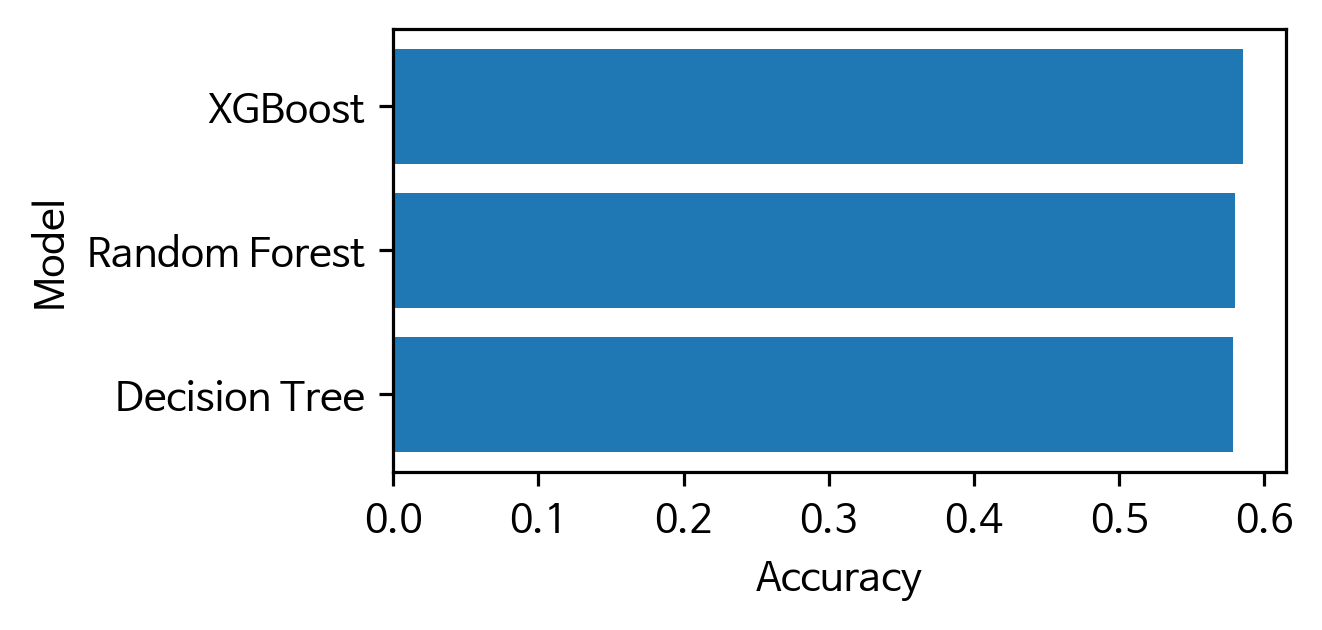

In [207]:
# 성능 시각화
plt.figure(figsize=(4, 2))
plt.barh(y=list(result), width=result.values())
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

### 2-2. 성능 튜닝

In [ ]:
# 파라미터 지정
param = {'xgbclassifier__max_depth': [13, 14, 15, 16, 17],
         'xgbclassifier__learning_rate': [0.08, 0.09, 0.10, 0.11, 0.12]}

# 모델 선언
model_pipe = GridSearchCV(xgb_pipe,
                          param,
                          cv=3,
                          scoring='accuracy')

# 학습하기
model_pipe.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=1, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.08, 0.09, 0.1, 0.11,
                                                          0.12],
                         'xgbclassifier__max_depth': [13, 14, 15, 16, 17]},
             scoring='accuracy')

In [ ]:
# 최적 파라미터, 예측 최고 성능
print(model_pipe.best_params_)
print(model_pipe.best_score_)

{'xgbclassifier__learning_rate': 0.08, 'xgbclassifier__max_depth': 13}
0.5846848669325597


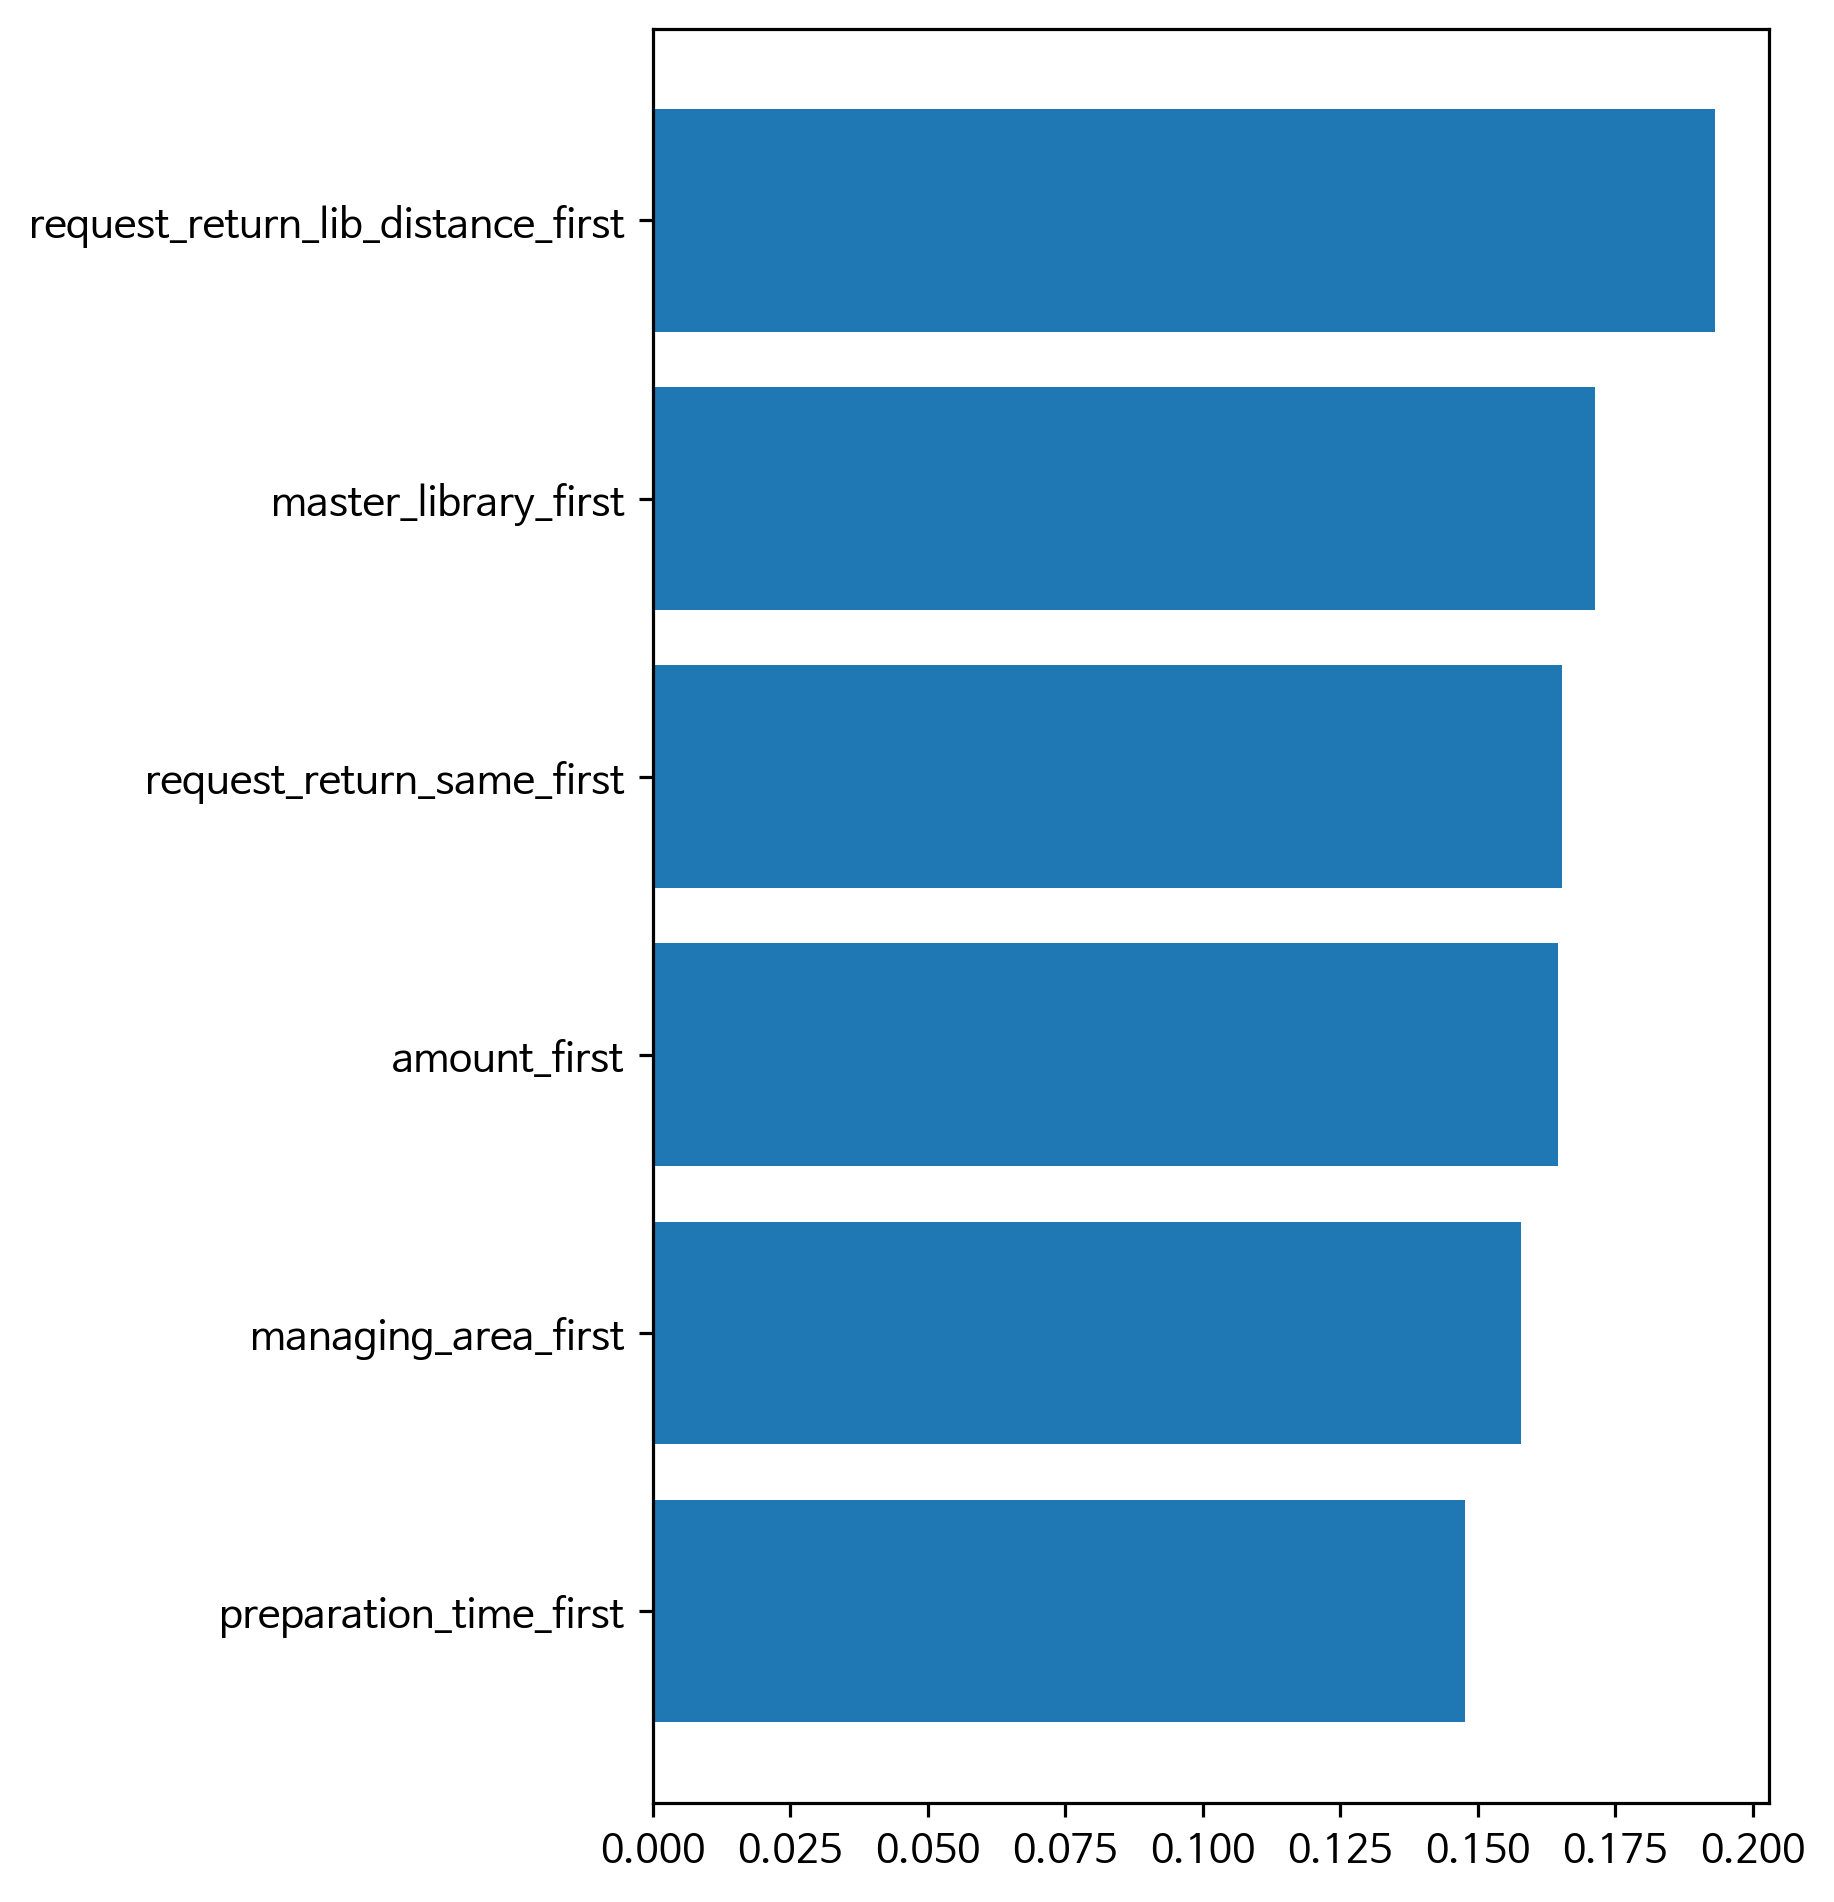

In [ ]:
# 변수 중요도 시각화
tmp = pd.DataFrame()
tmp['feature'] = list(X)
tmp['importance'] = model_pipe.best_estimator_[1].feature_importances_
tmp.sort_values(by='importance', inplace=True)

plt.figure(figsize=(5, 8))
plt.barh(y=tmp['feature'], width=tmp['importance'] )
plt.show()

In [ ]:
!pip3 install eli5

In [224]:
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    xgb_pipe.named_steps["xgbclassifier"],  # model
    scoring="accuracy",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=2,
)

# 스코어를 다시 계산합니다.
X_train_preprocessed = xgb_pipe[0].fit_transform(X_train)
X_test_preprocessed = xgb_pipe[0].fit_transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

NotFittedError: ignored

### **2-3.성능 평가**

- 최적 파라미터로 학습된 모델에 대해 예측과 평가를 진행합니다.

In [ ]:
# 예측하기
y_pred = model_pipe.predict(X_val) # model_pipe.best_estimators_ 안 해도 됨

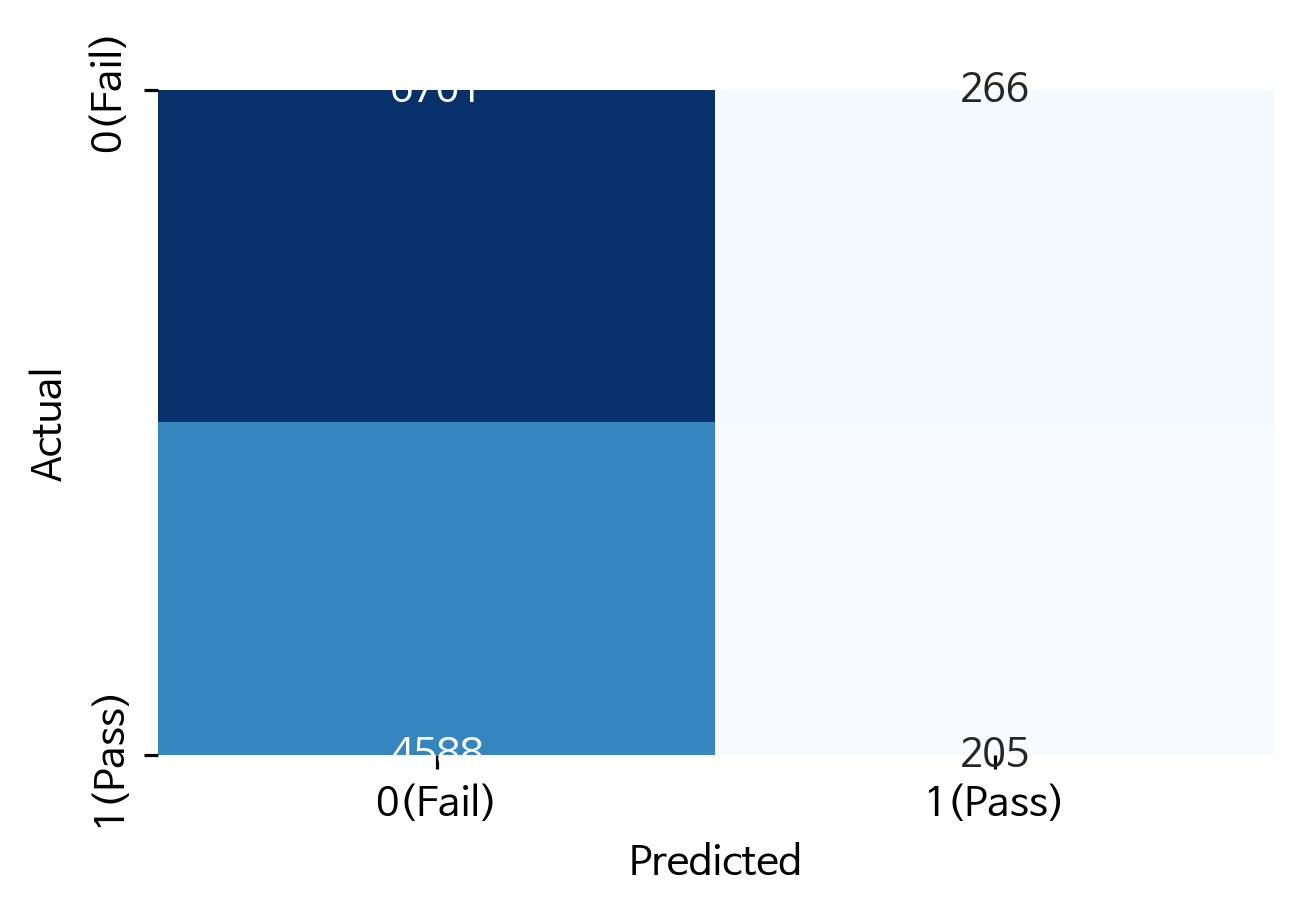

In [ ]:
# 혼동행렬 시각화
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_val, y_pred), 
            annot=True, 
            fmt='.0f',
            cmap='Blues',
            cbar=False,
            xticklabels=['0(Fail)', '1(Pass)'],
            yticklabels=['0(Fail)', '1(Pass)'],
            annot_kws={'size': 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73      6967
           1       0.44      0.04      0.08      4793

    accuracy                           0.59     11760
   macro avg       0.51      0.50      0.41     11760
weighted avg       0.53      0.59      0.47     11760



### 2-4. 모델 해석

In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
plt.rcParams["figure.dpi"] = 144

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f17590c82b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f17590d74c0>})

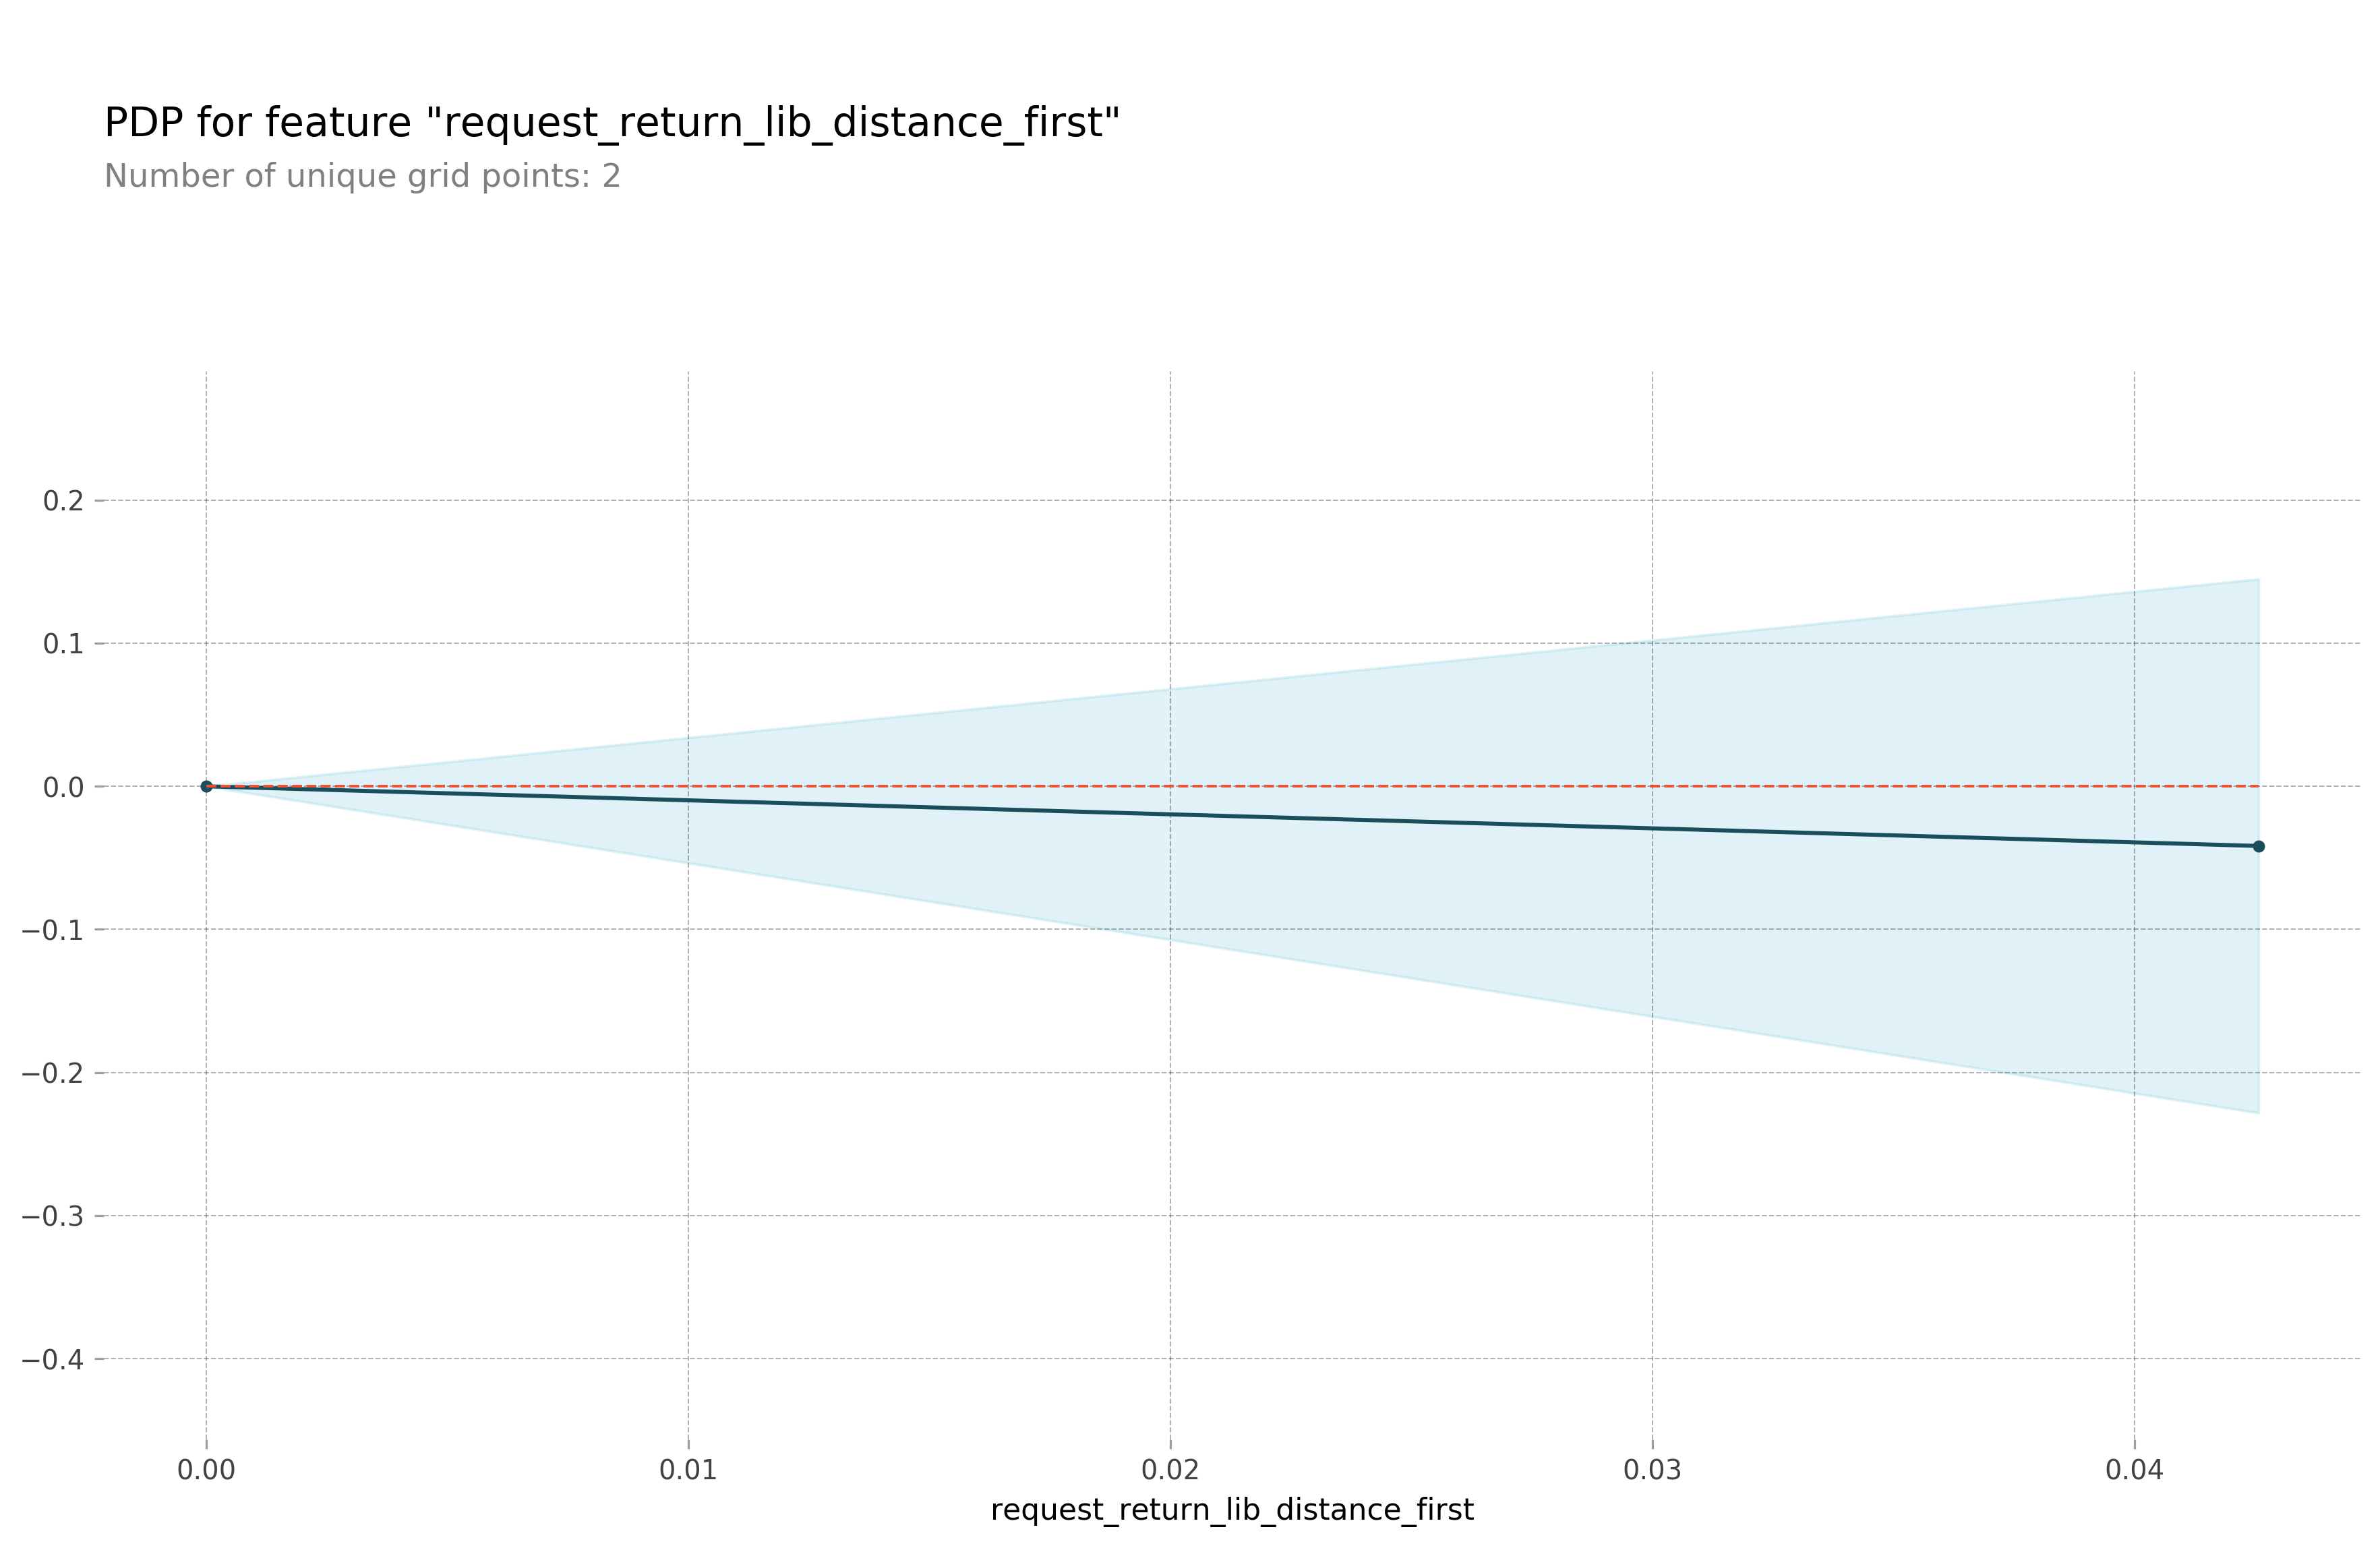

In [ ]:
# PDP Plot
from pdpbox.pdp import pdp_isolate, pdp_plot
target_feature = "request_return_lib_distance_first"

isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1758ff4580>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f175900f430>})

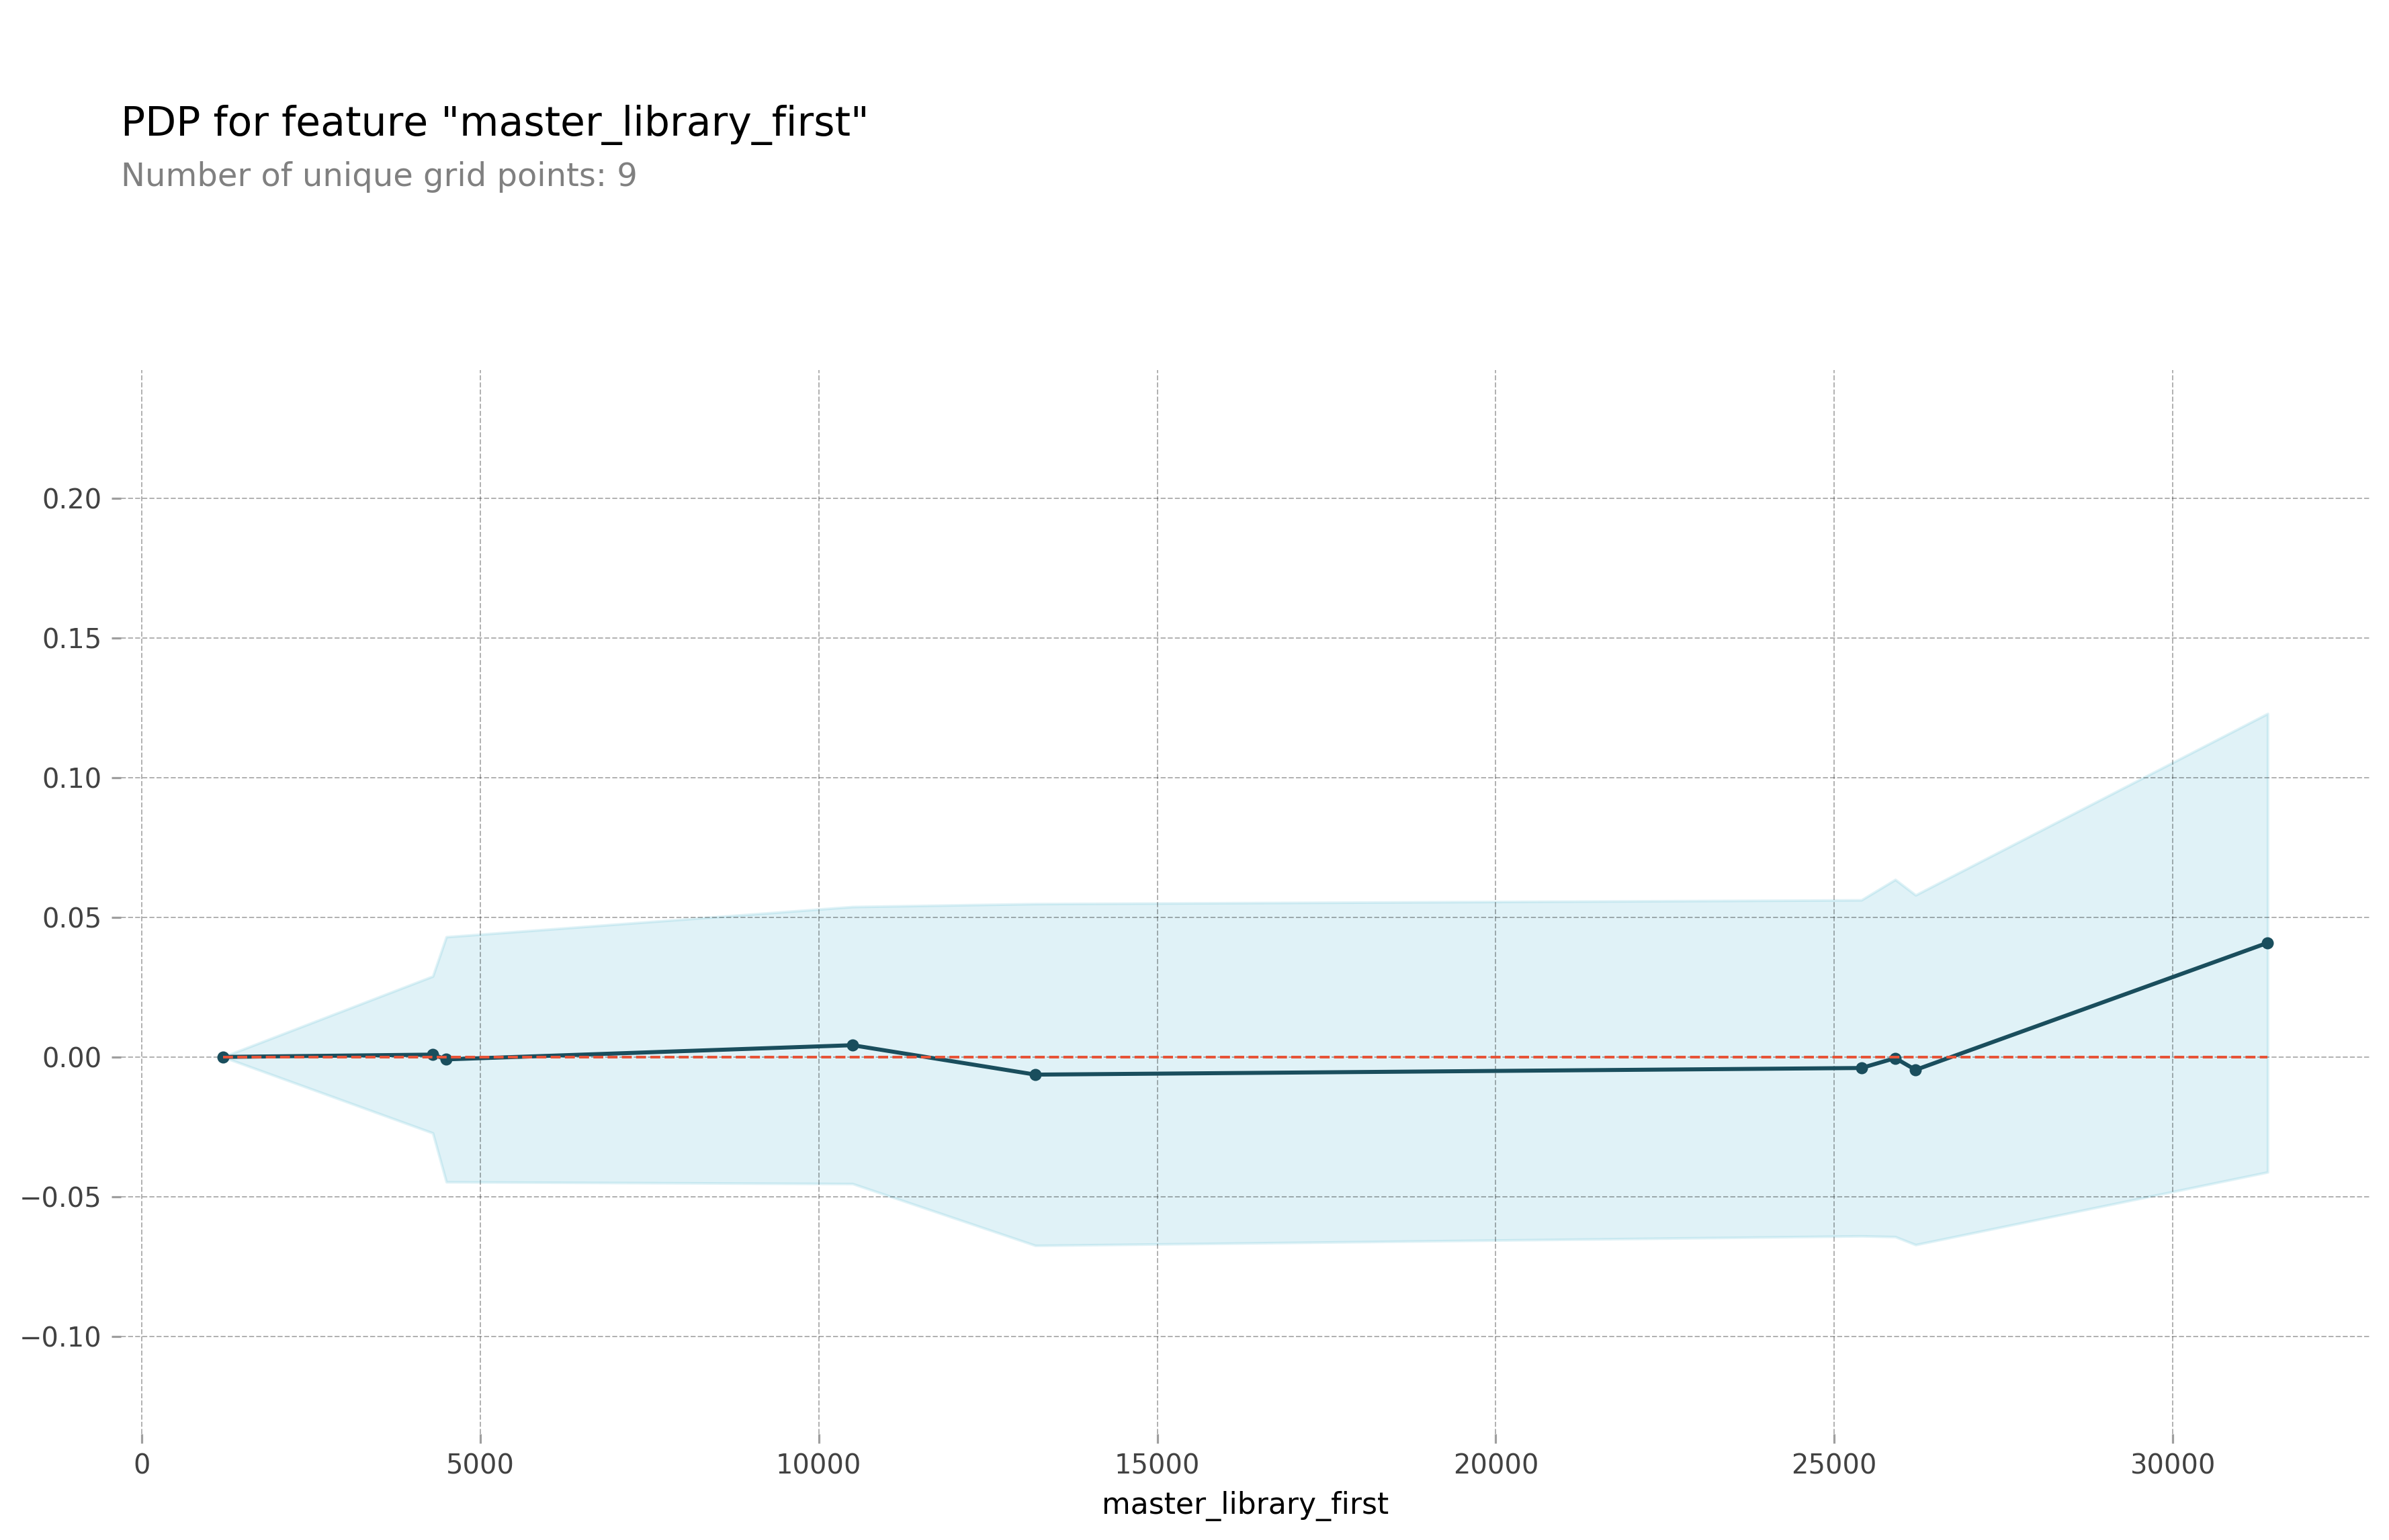

In [ ]:
target_feature = "master_library_first"

isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

In [ ]:
df

,amount_first,managing_area_first,master_library_first,remain_client,preparation_time_first,request_return_same_first,request_return_lib_distance_first
0,2,경기도 시흥시,25400,1,24.0,1,0.0
1,4,경기도 시흥시,25400,1,0.0,1,0.0
2,2,서울특별시 강남구,4500,0,24.0,1,0.0
3,1,서울특별시 강남구,4500,1,24.0,1,0.0
4,1,서울특별시 강남구,4500,0,24.0,1,0.0
...,...,...,...,...,...,...,...
55991,1,경기도 부천시,4300,1,24.0,1,0.0
55992,3,경기도 용인시,12200,1,72.0,1,0.0
55993,1,서울특별시 강북구,10800,1,0.0,1,0.0
55994,1,경기도 용인시,12200,1,48.0,1,0.0


(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f175832f3a0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1758f21490>})

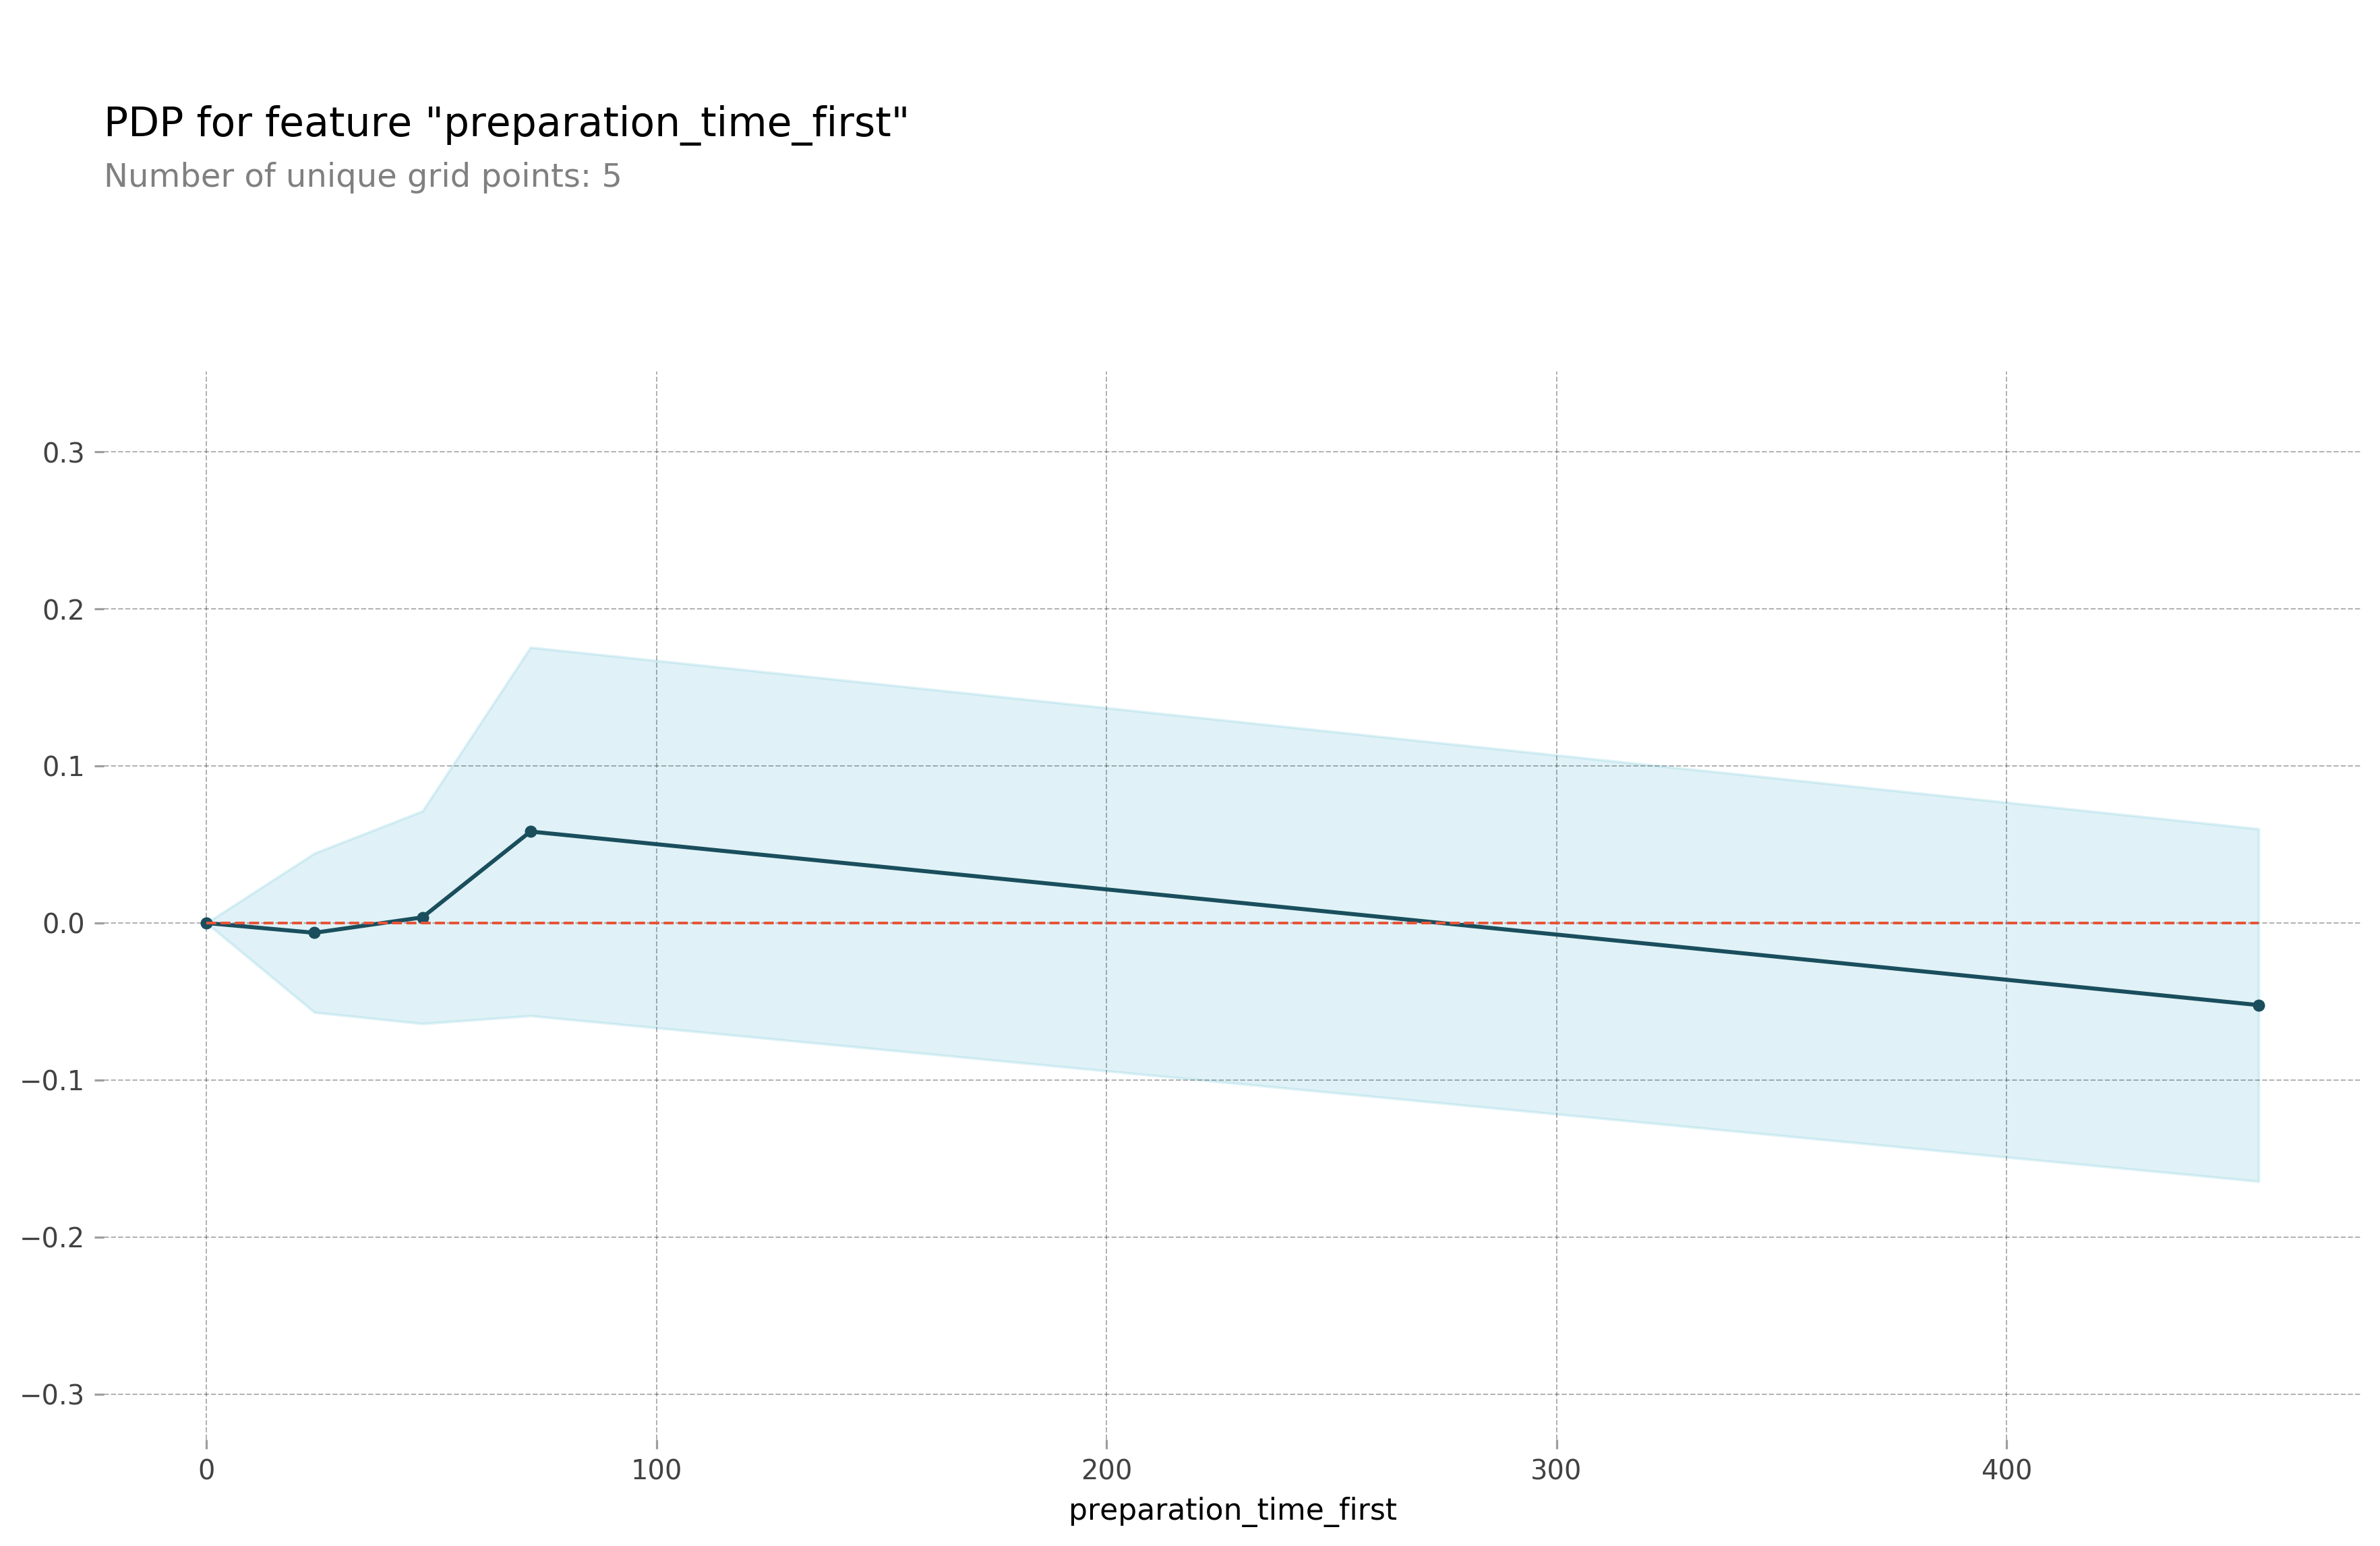

In [ ]:
target_feature = "preparation_time_first"

isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1758f21970>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f1758fd3850>})

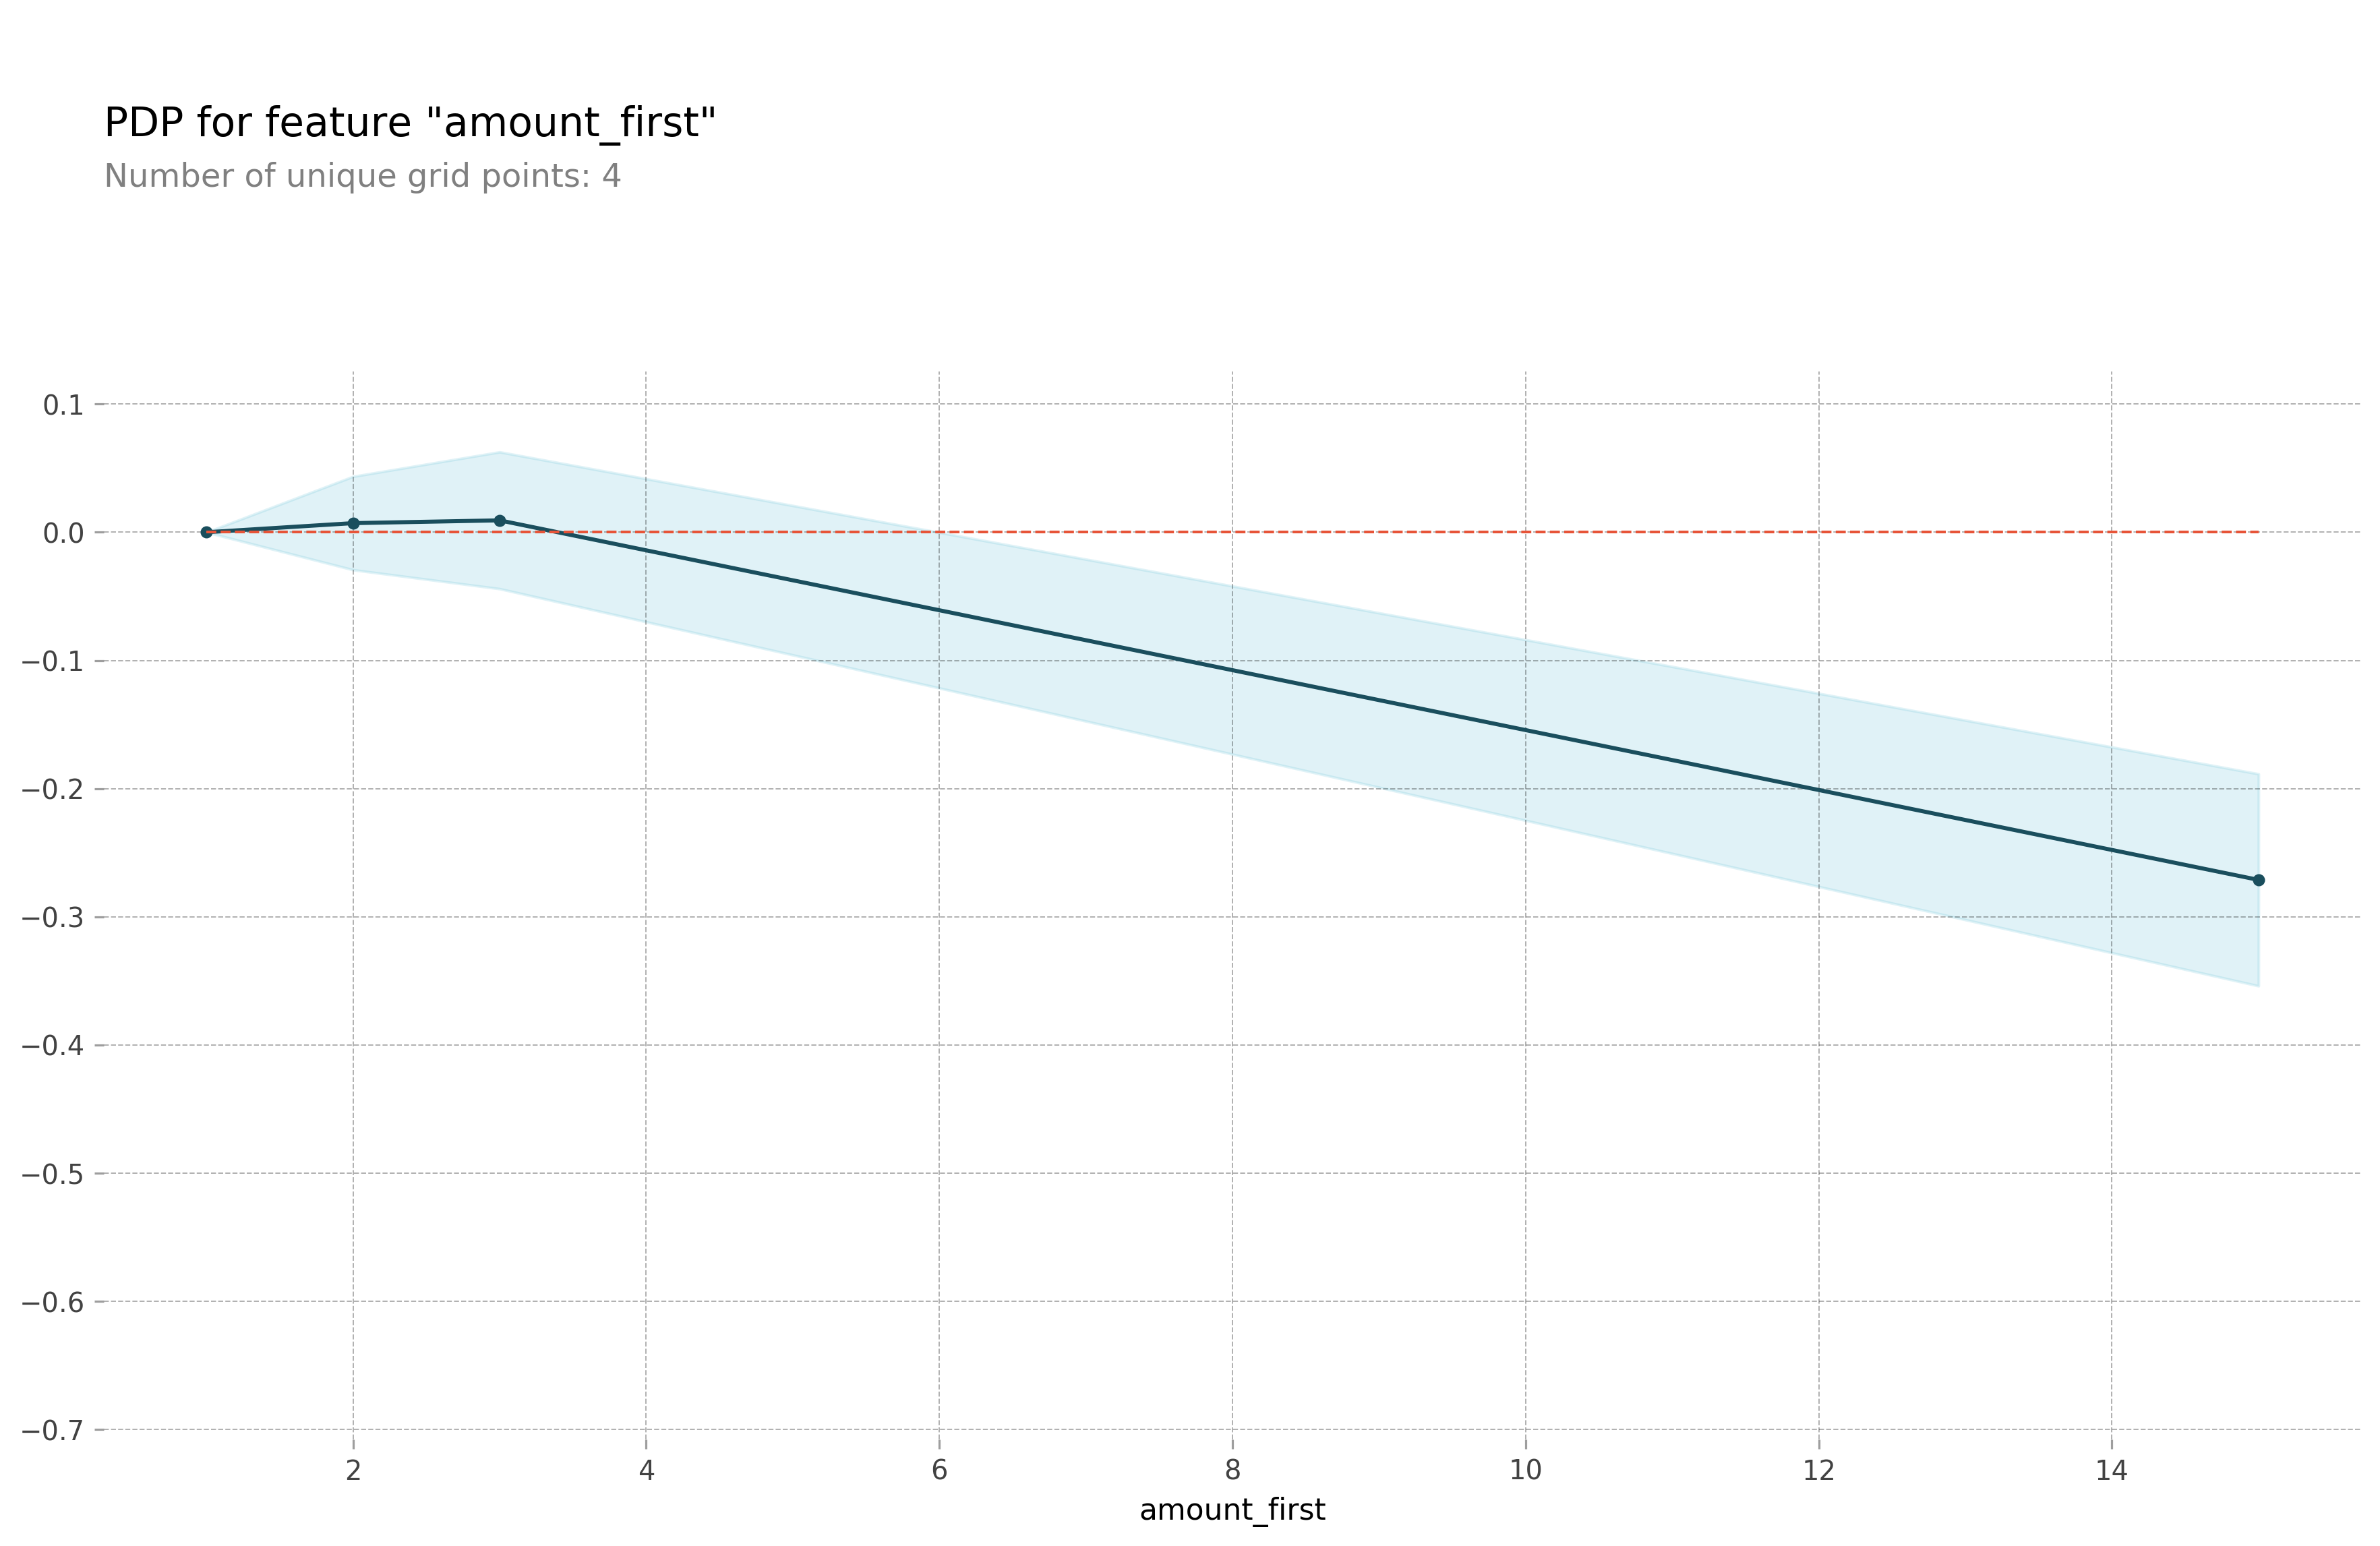

In [ ]:
target_feature = "amount_first"

isolated = pdp_isolate(
    model=model_pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)